<div class="alert alert-block alert-warning" style="text-align: center;">
    <b><p style="font-size: 42px; color: grey;">IE7300</p></b>
</div>
<div class="alert alert-block alert-warning" style="text-align: center;">
    <b><p style="font-size: 32px; color: darkOrange;">Final Project - Group 16</p></b>
</div>

<div class="alert alert-block alert-warning" style="text-align: center;">
    <b><p style="font-size: 20px; color: green;">Predicting Term Deposit Subscriptions
    </p></b>
</div>

<div class="alert alert-block alert-warning" style="text-align: center;">
    <b><p style="font-size: 16px; color: lightblue;">
    Data Source - <a href="https://archive.ics.uci.edu/dataset/222/bank+marketing">Click here</a></p></b>
</div>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bank Marketing Segmentation
 
![Bank Marketing Segmentation Banner](https://raw.githubusercontent.com/theamiteshtripathi/BankMarketingSegmentation/main/assets/BMS_Banner.png)
 
## Project Overview
 
**Bank Marketing Segmentation** is an innovative project that leverages data analysis and machine learning to understand and predict customer responses to bank marketing campaigns. Our goal is to enhance the efficiency of marketing strategies for a Portuguese banking institution by forecasting the likelihood of clients subscribing to term deposits.
 
## Data Set Information
 
Our analysis hinges on a comprehensive dataset from direct marketing campaigns conducted via phone calls. These campaigns often required multiple calls to the same client to gauge their interest in bank products, particularly term deposits. The dataset is enriched with diverse features, including client demographic data, details of the last contact in the current campaign, and various socio-economic attributes.
 
## Project Repository
 
This project, including its detailed documentation and code implementations, is hosted on GitHub and can be accessed here: [Bank Marketing Segmentation Repository](https://github.com/theamiteshtripathi/BankMarketingSegmentation).
 
## Collaborative Effort
 
This project is brought to life through the collaborative efforts of a dedicated team:
 
- Amitesh Tripathi
- Jaimeen Yogesh Kumar Unagar
- Meet Jayeshbhai Vasani
- Rohit Kumar Gaddam Sreeramulu
- Srinivas Murali

In [35]:
# Load the data

# Note: please pick the bank_additional-full.csv dataset from the bank-additional folder once you download the dataset
# You will have to go into the bank-additional sub folder and then another bank-additional sub folder
bank_data = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank-additional-full.csv")

# Drop duration
#df.drop('duration', axis=1, inplace=True)
#df.drop('emp.var.rate', axis = 1, inplace= True)

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Distribution of Target Variable (y):** Understanding the balance between the classes (subscribed vs. not subscribed).

**Univariate Analysis:** Analyzing the distribution of individual features.

**Bivariate Analysis:** Exploring the relationship between the features and the target variable.

**Correlation Analysis:** Checking if there are any highly correlated features.

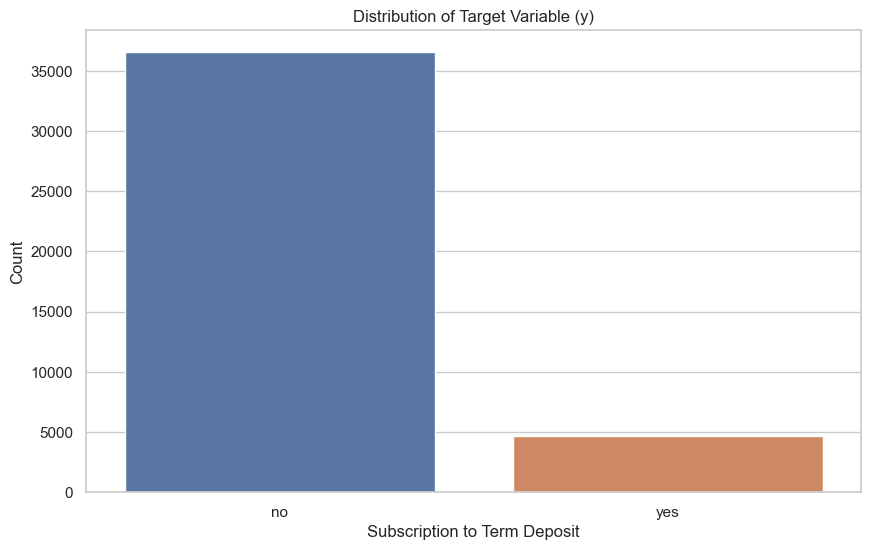

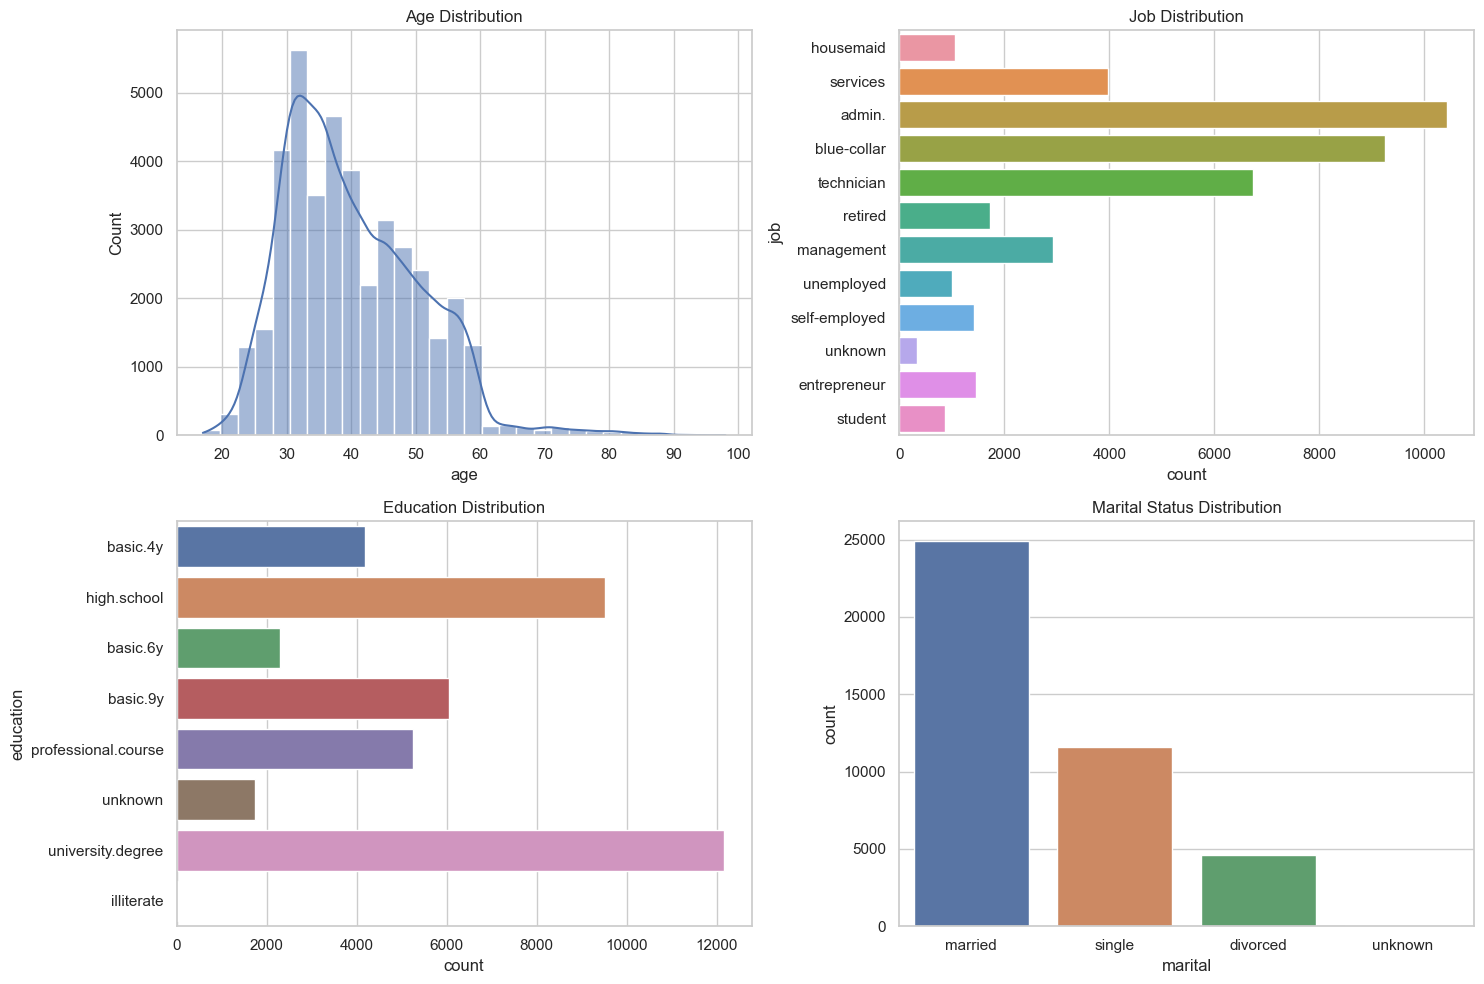

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=bank_data)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

# Univariate Analysis of some key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age Distribution
sns.histplot(bank_data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Job Distribution
sns.countplot(y='job', data=bank_data, ax=axes[0, 1])
axes[0, 1].set_title('Job Distribution')

# Education Distribution
sns.countplot(y='education', data=bank_data, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution')

# Marital Status Distribution
sns.countplot(x='marital', data=bank_data, ax=axes[1, 1])
axes[1, 1].set_title('Marital Status Distribution')

plt.tight_layout()
plt.show()


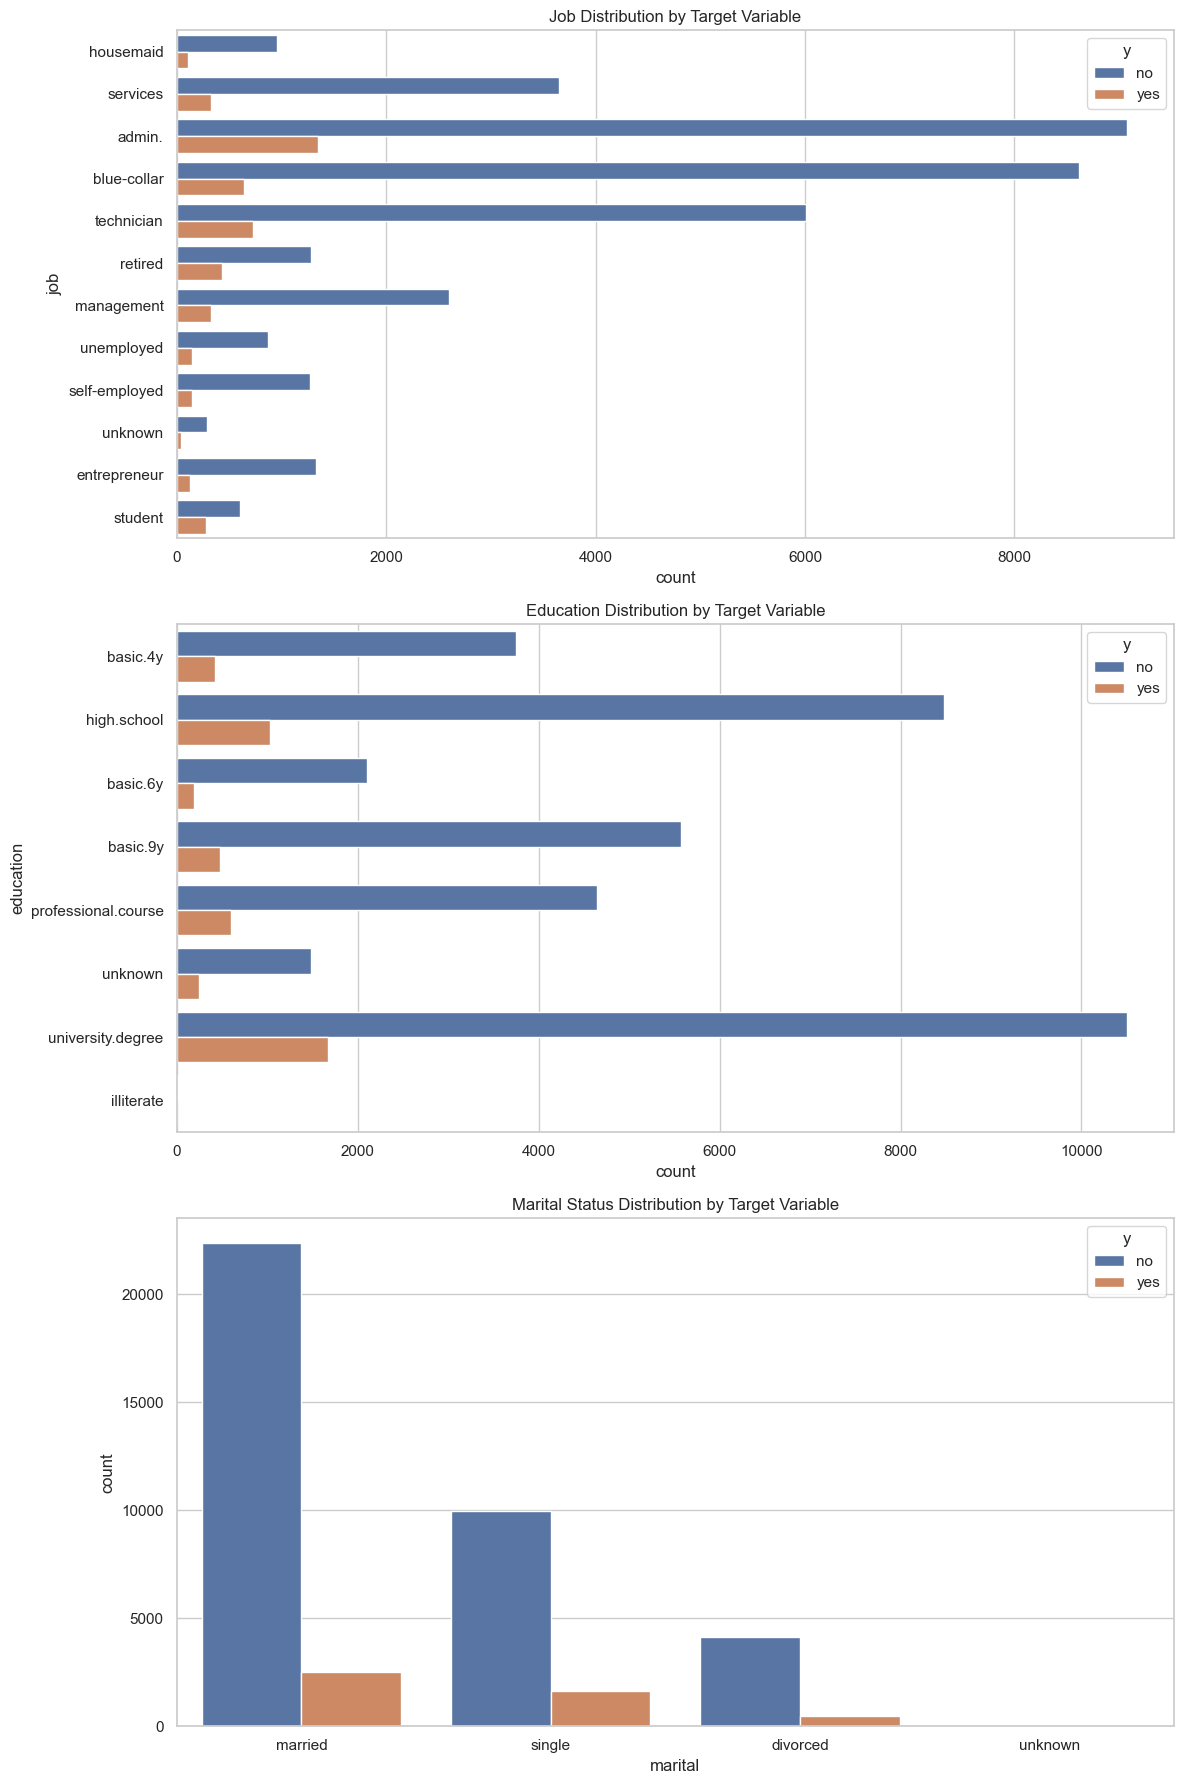

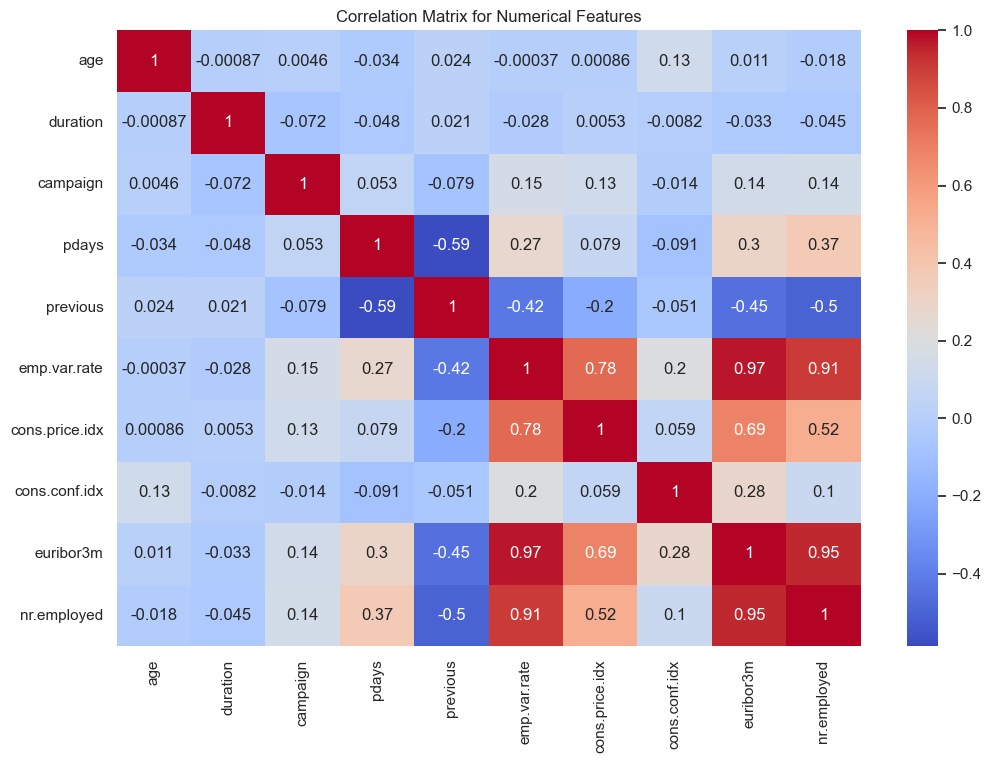

In [4]:
# Bivariate Analysis for Categorical Features
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Job vs Target Variable
sns.countplot(y='job', hue='y', data=bank_data, ax=axes[0])
axes[0].set_title('Job Distribution by Target Variable')

# Education vs Target Variable
sns.countplot(y='education', hue='y', data=bank_data, ax=axes[1])
axes[1].set_title('Education Distribution by Target Variable')

# Marital Status vs Target Variable
sns.countplot(x='marital', hue='y', data=bank_data, ax=axes[2])
axes[2].set_title('Marital Status Distribution by Target Variable')

plt.tight_layout()
plt.show()

# Correlation Analysis for Numerical Features
# Selecting numerical features for correlation analysis
numerical_features = bank_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = bank_data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


***Identified Highly Correlated Features***

**The analysis reveals the following pairs of highly correlated features:**

euribor3m and emp.var.rate with a correlation coefficient of approximately 0.97.
nr.employed and euribor3m with a correlation coefficient of about 0.95.
nr.employed and emp.var.rate with a correlation coefficient around 0.91.
cons.price.idx and emp.var.rate with a correlation coefficient of about 0.78.

**Analyzing Redundancy**

euribor3m, emp.var.rate, and nr.employed: These three features are highly interrelated. Since they all are economic indicators, it's likely that they carry similar information regarding the economic condition during the time of the campaign.

**cons.price.idx and emp.var.rate:**
Although correlated, the consumer price index (cons.price.idx) and the employment variation rate (emp.var.rate) may capture different aspects of the economy.

**Analyzing Correlation Among Economic Indicators:**

The high correlations among euribor3m, emp.var.rate, and nr.employed suggest that these indicators move together. This might be due to their connection to the broader economic situation, which impacts both employment and interest rates.

In [5]:
# Identifying Highly Correlated Features
# We use a threshold of 0.75 for high correlation
high_corr_threshold = 0.75
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Creating a DataFrame for better visualization
high_corr_df = pd.DataFrame(highly_correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])
high_corr_df.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

high_corr_df

,Feature 1,Feature 2,Correlation Coefficient
1,euribor3m,emp.var.rate,0.972245
3,nr.employed,euribor3m,0.945154
2,nr.employed,emp.var.rate,0.906970
0,cons.price.idx,emp.var.rate,0.775334


In [6]:
# Creating a composite economic indicator
bank_data['composite_economic_indicator'] = bank_data[['euribor3m', 'emp.var.rate', 'nr.employed']].mean(axis=1)

# Implementing Binning for the 'age' feature
# Defining age bins
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '>60']

# Creating a new column for binned age
bank_data['age_group'] = pd.cut(bank_data['age'], bins=age_bins, labels=age_labels, right=False)

# Displaying the first few rows of the modified dataset
bank_data[['age', 'age_group', 'composite_economic_indicator']].head()
#ank_data.head()

,age,age_group,composite_economic_indicator
0,56,50-60,1732.319
1,57,50-60,1732.319
2,37,30-40,1732.319
3,40,40-50,1732.319
4,56,50-60,1732.319


In [7]:
# Check if categorical columns have nulls
categorical = bank_data.select_dtypes(include='object').columns

for x in categorical:
    if bank_data[x].isnull().any() or (bank_data[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
categorical = bank_data.select_dtypes(include=['int64', 'float64']).columns

for x in categorical:
    if bank_data[x].isnull().any() or (bank_data[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in emp.var.rate
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed
No Nulls in composite_economic_indicator


In [8]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000000,32.000,38.000,47.000000,98.000000
duration,41188.0,258.285010,259.279249,0.000000,102.000,180.000,319.000000,4918.000000
campaign,41188.0,2.567593,2.770014,1.000000,1.000,2.000,3.000000,56.000000
pdays,41188.0,962.475454,186.910907,0.000000,999.000,999.000,999.000000,999.000000
previous,41188.0,0.172963,0.494901,0.000000,0.000,0.000,0.000000,7.000000
emp.var.rate,41188.0,0.081886,1.570960,-3.400000,-1.800,1.100,1.400000,1.400000
cons.price.idx,41188.0,93.575664,0.578840,92.201000,93.075,93.749,93.994000,94.767000
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800000,-42.700,-41.800,-36.400000,-26.900000
euribor3m,41188.0,3.621291,1.734447,0.634000,1.344,4.857,4.961000,5.045000
nr.employed,41188.0,5167.035911,72.251528,4963.600000,5099.100,5191.000,5228.100000,5228.100000


In [9]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = bank_data.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {bank_data[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [10]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays']

for i in x:
    unknown_count = (bank_data[i] == 'unknown').sum()
    print(f"{i}: {bank_data[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20], Number of 'unknown': 0


In [11]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = bank_data[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (bank_data[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:admin., Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:university.degree, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [12]:
# Get unique value counts for all columns
unique_value_counts = {}

for column in bank_data.columns:
    unique_counts = bank_data[column].value_counts()
    unique_value_counts[column] = unique_counts

# Print the unique value counts for each column
for column, counts in unique_value_counts.items():
    print(f"Unique value counts for '{column}':\n{counts}\n")

Unique value counts for 'age':
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Unique value counts for 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Unique value counts for 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Unique value counts for 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Unique value counts

In [13]:
# Transform 'pdays' to a binary feature where '1' indicates the client was previously contacted (pdays < 999)
# and '0' indicates the client was not previously contacted (pdays = 999)
bank_data['pdays_contacted'] = bank_data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Now, we can drop the original 'pdays' column
bank_data = bank_data.drop('pdays', axis=1)

# Display the first few rows to verify the transformation
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,composite_economic_indicator,age_group,pdays_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,30-40,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,40-50,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0


In [14]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,composite_economic_indicator,age_group,pdays_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,30-40,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,40-50,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1732.319,50-60,0


In [15]:
# Get a list of numerical columns
numerical_columns = bank_data.select_dtypes(include=['number']).columns.tolist()

# Print the list of numerical columns
print("Numerical Features in the DataFrame:")
print(numerical_columns)

Numerical Features in the DataFrame:
['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'composite_economic_indicator', 'pdays_contacted']


Age: Keep. Age could influence financial decisions like term deposit subscriptions.

Job: Keep. Different jobs may have different financial needs and preferences.

Marital: Keep. Marital status might correlate with financial stability and decisions.

Education: Keep. Education level can influence financial understanding and decisions.

Default: Keep. Credit default history is a crucial factor in financial decision-making.

Housing: Keep. Indicates if the client has a housing loan, which might affect their decision.

Loan: Keep. Similar to housing, having a personal loan could influence the decision.

Contact: Keep. The contact method might impact the effectiveness of the marketing campaign.

Month: Keep. The time of year might influence financial decisions.

Day_of_week: Keep. Day of the week could have a subtle effect on client's responsiveness.

Duration: Consider Removing. This feature highly affects the output target (if duration=0 then 'y'=no). However, this is not known before a call is made and thus should not be included in a predictive model.

Campaign: Keep. Number of contacts performed during this campaign might be relevant.

Pdays: Keep. Number of days that passed by after the client was last contacted.

Previous: Keep. Number of contacts performed before this campaign.

Poutcome: Keep. Outcome of the previous marketing campaign can be significant.

Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed: Consider
Replacing with 'Composite Economic Indicator'. These features are highly correlated and can be represented by the composite indicator.

Composite Economic Indicator: Keep. Represents combined economic factors.

Age Group: Consider Removing. This is a binned version of 'age' and might be redundant.

In [16]:
# Dropping the specified columns
columns_to_drop = ['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_group']
bank_data_dropped = bank_data.drop(columns=columns_to_drop)

# Displaying the first few rows of the updated dataset
bank_data_dropped.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y,composite_economic_indicator,pdays_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,no,1732.319,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,no,1732.319,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,no,1732.319,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,no,1732.319,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,no,1732.319,0


In [17]:
# Get a list of numerical columns
numerical_columns = bank_data_dropped.select_dtypes(include=['number']).columns.tolist()

# Print the list of numerical columns
print("Numerical Features in the DataFrame:")
print(numerical_columns)

Numerical Features in the DataFrame:
['age', 'campaign', 'previous', 'composite_economic_indicator', 'pdays_contacted']


Pdays_Contacted: This is already a binary feature (0 or 1) indicating whether the client was contacted previously or not. There is no need to normalize binary features.

In [18]:
numerical_columns_to_normalize = ['age', 'campaign', 'previous', 'composite_economic_indicator']

In [19]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical features to normalize and bringing them back to the main dataframe

scaler = StandardScaler()

df_numerical = bank_data_dropped[numerical_columns_to_normalize]
df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns_to_normalize)

df_categorical = bank_data_dropped.drop(numerical_columns_to_normalize, axis=1)

normalized_bank_data = pd.concat([df_numerical_normalized, df_categorical.reset_index(drop=True)], axis=1)
normalized_bank_data.head()


,age,campaign,previous,composite_economic_indicator,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,pdays_contacted
0,1.533034,-0.565922,-0.349494,0.348069,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,1.628993,-0.565922,-0.349494,0.348069,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,-0.290186,-0.565922,-0.349494,0.348069,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,-0.002309,-0.565922,-0.349494,0.348069,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,1.533034,-0.565922,-0.349494,0.348069,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


In [20]:
# Get a list of categorical columns
categorical_columns = normalized_bank_data.select_dtypes(include=['object']).columns.tolist()

# Print categorical columns and their unique value counts
for column in categorical_columns:
    unique_values = bank_data[column].unique()
    num_unique = len(unique_values)
    value_counts = bank_data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of Unique Values: {num_unique}")
    print(f"Unique Values: {unique_values}")
    print("Value Counts:")
    print(value_counts)
    print("\n")

Column: job
Number of Unique Values: 12
Unique Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Value Counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Column: marital
Number of Unique Values: 4
Unique Values: ['married' 'single' 'divorced' 'unknown']
Value Counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Column: education
Number of Unique Values: 8
Unique Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Value Counts:
education
university.degree      12168
high.school            

- Noticed only 3 records for default = 'yes' which doesn't add much value and so is dropped
- Noticed a small amount of records where job and marital had 'unknowns' or 'N/A' and so are dropped

In [21]:
# Filtering out instances where 'default' is 'yes'
normalized_bank_data = normalized_bank_data[normalized_bank_data['default'] != 'yes']

# Dropping records with 'unknown' in 'job' and 'marital'
normalized_bank_data = normalized_bank_data[~normalized_bank_data['job'].isin(['unknown'])]
normalized_bank_data = normalized_bank_data[~normalized_bank_data['marital'].isin(['unknown'])]

normalized_bank_data.head()


,age,campaign,previous,composite_economic_indicator,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,pdays_contacted
0,1.533034,-0.565922,-0.349494,0.348069,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,1.628993,-0.565922,-0.349494,0.348069,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,-0.290186,-0.565922,-0.349494,0.348069,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,-0.002309,-0.565922,-0.349494,0.348069,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,1.533034,-0.565922,-0.349494,0.348069,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


- Categorical columns with >2 unique values can be label encoded instead of One Hot encoding 

In [22]:
from sklearn.preprocessing import LabelEncoder

encoded_bank_data = normalized_bank_data.copy()
label_encoder = LabelEncoder()

columns_to_encode = ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']

for column in columns_to_encode:
    encoded_bank_data[column] = label_encoder.fit_transform(encoded_bank_data[column])

# Binary encoding using map
binary_mappings = {
    'y': {'no': 0, 'yes': 1},
    'default': {'no': 1, 'unknown': 0, 'yes': 2},
    'contact': {'cellular': 1, 'telephone': 0},
    'loan': {'yes': 1, 'no': 0, 'unknown': 2},
    'housing': {'yes': 1, 'no': 0, 'unknown': 2}
}

for column, mapping in binary_mappings.items():
    encoded_bank_data[column] = encoded_bank_data[column].map(mapping)

encoded_bank_data

,age,campaign,previous,composite_economic_indicator,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,pdays_contacted
0,1.533034,-0.565922,-0.349494,0.348069,3,1,0,1,0,0,0,6,1,1,0,0
1,1.628993,-0.565922,-0.349494,0.348069,7,1,3,0,0,0,0,6,1,1,0,0
2,-0.290186,-0.565922,-0.349494,0.348069,7,1,3,1,1,0,0,6,1,1,0,0
3,-0.002309,-0.565922,-0.349494,0.348069,0,1,1,1,0,0,0,6,1,1,0,0
4,1.533034,-0.565922,-0.349494,0.348069,7,1,3,1,0,1,0,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-2.750932,5,1,5,1,1,0,1,7,0,1,1,0
41184,0.573445,-0.565922,-0.349494,-2.750932,1,1,5,1,0,0,1,7,0,1,0,0
41185,1.533034,-0.204909,-0.349494,-2.750932,5,1,6,1,1,0,1,7,0,1,0,0
41186,0.381527,-0.565922,-0.349494,-2.750932,9,1,5,1,0,0,1,7,0,1,1,0


**Logistic Regression Class**
- Basic logistic regression implementation that uses the negative log likelihood and gradient descent
- split_data() also includes different sampling techniques as the dataset under study is imbalanced with minority positive class 
- run_model() calculates the accuracy metrics, plots the cost, the roc curve, along with a probability threshold adjustment for post processing
- run_kfold() is implemented to do kfold model evaluation
- A small cost analysis is done where different weights are assigned depending on the problem at hand (to reduce false negatives) 

*Observations*
- Please refer the Project report document for further details


100%|██████████| 2500/2500 [00:04<00:00, 575.06it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


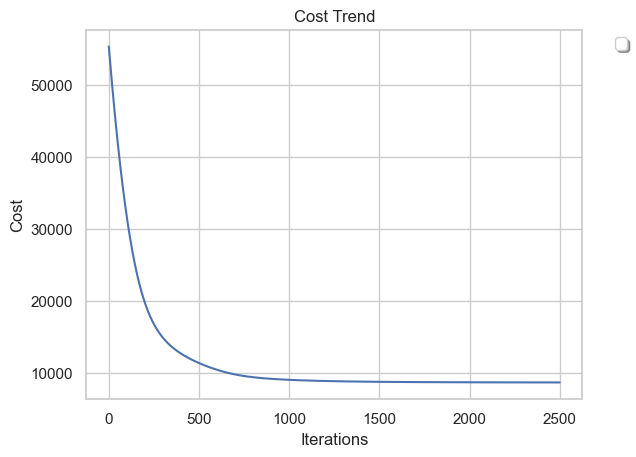

TP: 321 FP: 172 TN: 8845 FN: 858

Confusion Matrix:
[[8845  172]
 [ 858  321]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9017
           1       0.65      0.27      0.38      1179

    accuracy                           0.90     10196
   macro avg       0.78      0.63      0.66     10196
weighted avg       0.88      0.90      0.88     10196


Balanced Accuracy: 62.66 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 50645 - 8752 = 41893


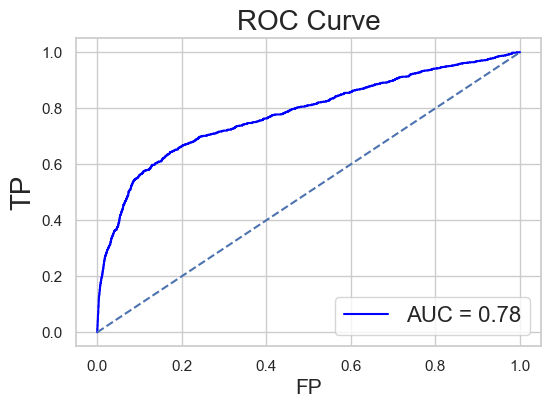

100%|██████████| 2500/2500 [00:06<00:00, 385.14it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


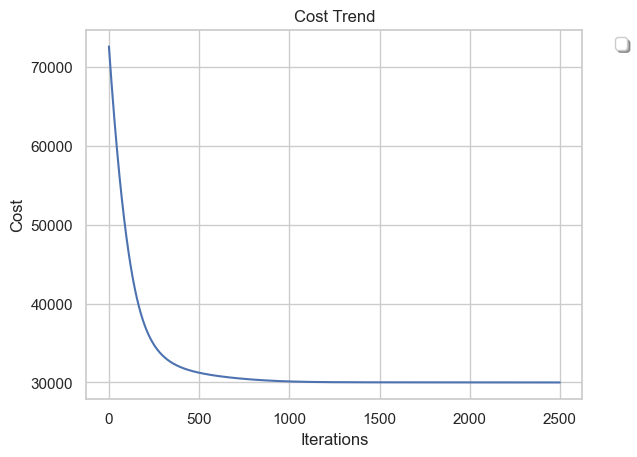

TP: 838 FP: 2546 TN: 6471 FN: 341

Confusion Matrix:
[[6471 2546]
 [ 341  838]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      9017
           1       0.25      0.71      0.37      1179

    accuracy                           0.72     10196
   macro avg       0.60      0.71      0.59     10196
weighted avg       0.87      0.72      0.77     10196


Balanced Accuracy: 71.42 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 49115 - 5956 = 43159


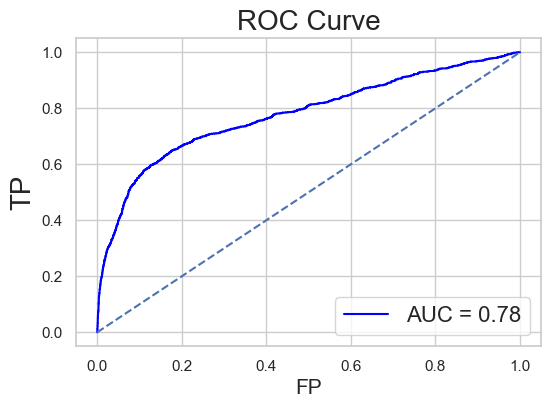

100%|██████████| 2500/2500 [00:02<00:00, 1103.52it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


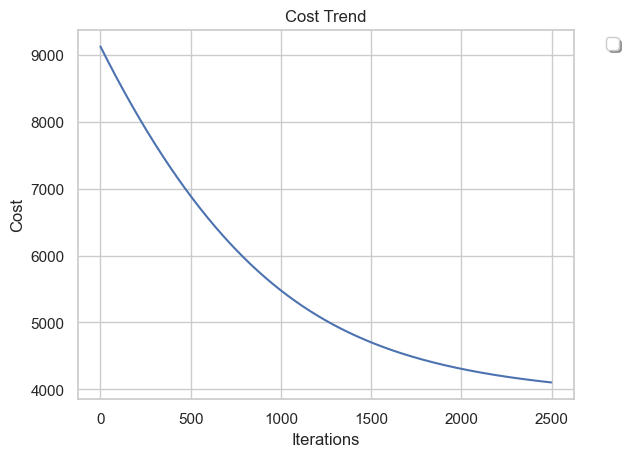

TP: 910 FP: 4053 TN: 4964 FN: 269

Confusion Matrix:
[[4964 4053]
 [ 269  910]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70      9017
           1       0.18      0.77      0.30      1179

    accuracy                           0.58     10196
   macro avg       0.57      0.66      0.50     10196
weighted avg       0.86      0.58      0.65     10196


Balanced Accuracy: 66.12 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 43020 - 6743 = 36277


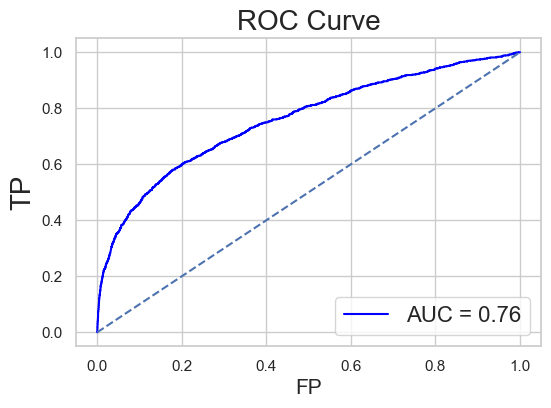

100%|██████████| 2500/2500 [00:06<00:00, 379.70it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


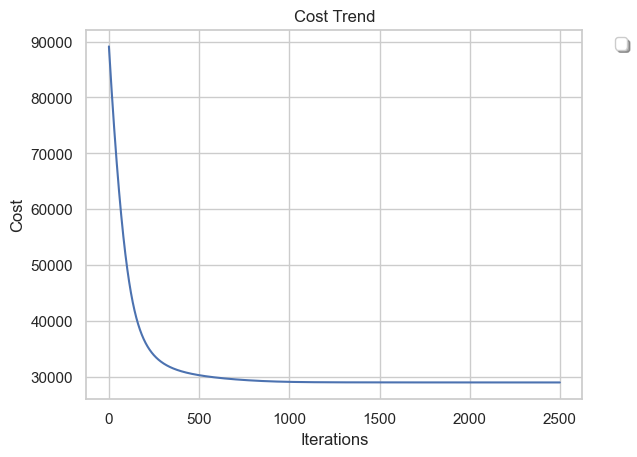

TP: 817 FP: 2735 TN: 6282 FN: 362

Confusion Matrix:
[[6282 2735]
 [ 362  817]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      9017
           1       0.23      0.69      0.35      1179

    accuracy                           0.70     10196
   macro avg       0.59      0.69      0.57     10196
weighted avg       0.86      0.70      0.75     10196


Balanced Accuracy: 69.48 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 47750 - 6355 = 41395


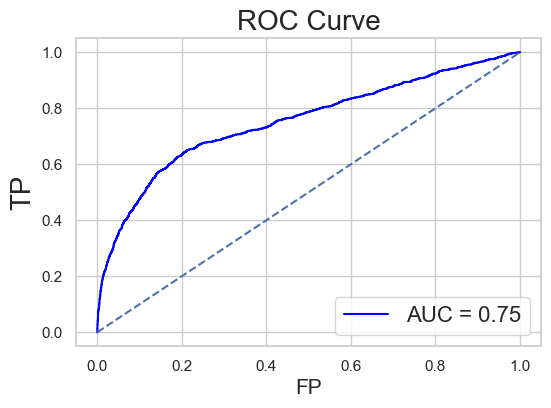

Fold 1:


100%|██████████| 2500/2500 [00:04<00:00, 520.96it/s]



Test Set Metrics:
TP: 240 FP: 144 TN: 7118 FN: 655

Confusion Matrix:
[[7118  144]
 [ 655  240]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7262
           1       0.62      0.27      0.38       895

    accuracy                           0.90      8157
   macro avg       0.77      0.62      0.66      8157
weighted avg       0.88      0.90      0.88      8157


Balanced Accuracy: 62.42 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40390 - 6694 = 33696


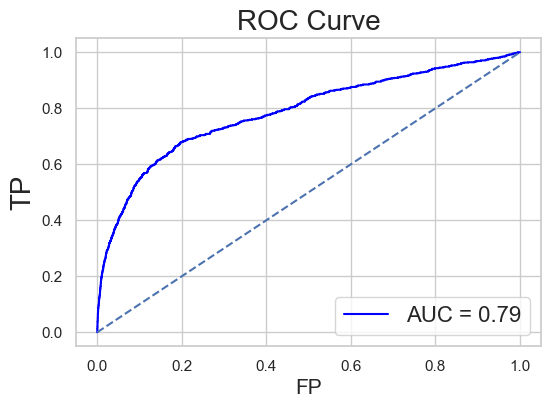

Fold 2:


100%|██████████| 2500/2500 [00:04<00:00, 581.91it/s]



Test Set Metrics:
TP: 237 FP: 131 TN: 7060 FN: 729

Confusion Matrix:
[[7060  131]
 [ 729  237]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7191
           1       0.64      0.25      0.36       966

    accuracy                           0.89      8157
   macro avg       0.78      0.61      0.65      8157
weighted avg       0.88      0.89      0.87      8157


Balanced Accuracy: 61.36 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40040 - 7421 = 32619


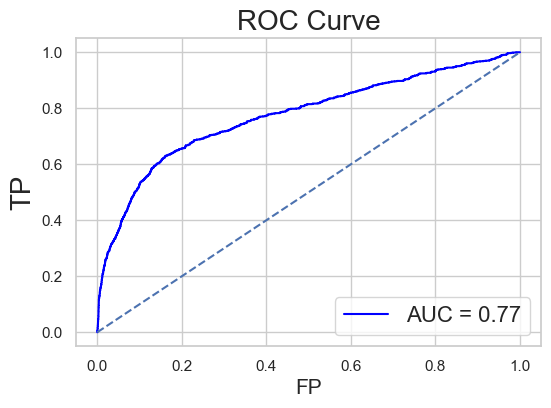

Fold 3:


100%|██████████| 2500/2500 [00:04<00:00, 592.60it/s]



Test Set Metrics:
TP: 249 FP: 132 TN: 7057 FN: 719

Confusion Matrix:
[[7057  132]
 [ 719  249]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7189
           1       0.65      0.26      0.37       968

    accuracy                           0.90      8157
   macro avg       0.78      0.62      0.66      8157
weighted avg       0.88      0.90      0.88      8157


Balanced Accuracy: 61.94 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40265 - 7322 = 32943


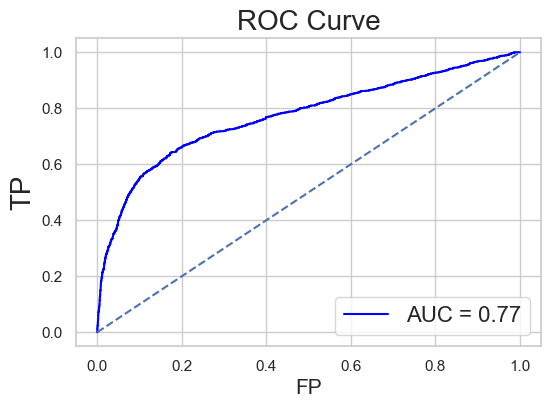

Fold 4:


100%|██████████| 2500/2500 [00:04<00:00, 593.37it/s]



Test Set Metrics:
TP: 236 FP: 137 TN: 7120 FN: 664

Confusion Matrix:
[[7120  137]
 [ 664  236]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7257
           1       0.63      0.26      0.37       900

    accuracy                           0.90      8157
   macro avg       0.77      0.62      0.66      8157
weighted avg       0.88      0.90      0.88      8157


Balanced Accuracy: 62.17 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40320 - 6777 = 33543


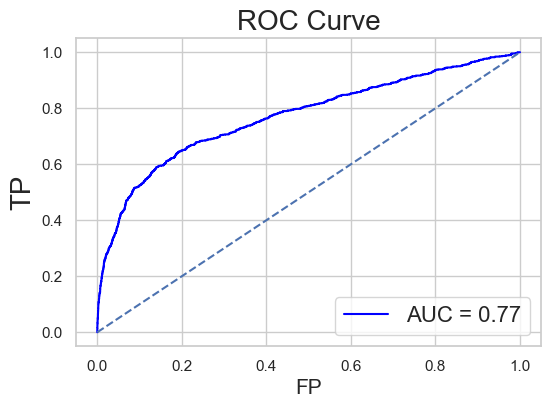

Fold 5:


100%|██████████| 2500/2500 [00:04<00:00, 583.59it/s]



Test Set Metrics:
TP: 225 FP: 162 TN: 7129 FN: 640

Confusion Matrix:
[[7129  162]
 [ 640  225]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7291
           1       0.58      0.26      0.36       865

    accuracy                           0.90      8156
   macro avg       0.75      0.62      0.65      8156
weighted avg       0.88      0.90      0.88      8156


Balanced Accuracy: 61.89 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40145 - 6562 = 33583


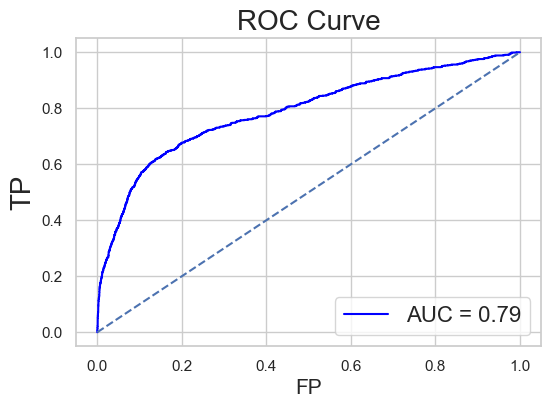

Fold 1:


100%|██████████| 2500/2500 [00:06<00:00, 393.08it/s]



Test Set Metrics:
TP: 644 FP: 2008 TN: 5254 FN: 251

Confusion Matrix:
[[5254 2008]
 [ 251  644]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7262
           1       0.24      0.72      0.36       895

    accuracy                           0.72      8157
   macro avg       0.60      0.72      0.59      8157
weighted avg       0.88      0.72      0.77      8157


Balanced Accuracy: 72.15 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39150 - 4518 = 34632


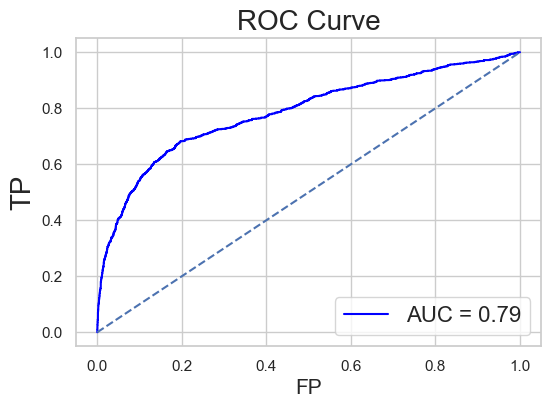

Fold 2:


100%|██████████| 2500/2500 [00:06<00:00, 377.65it/s]



Test Set Metrics:
TP: 684 FP: 2011 TN: 5180 FN: 282

Confusion Matrix:
[[5180 2011]
 [ 282  684]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7191
           1       0.25      0.71      0.37       966

    accuracy                           0.72      8157
   macro avg       0.60      0.71      0.60      8157
weighted avg       0.87      0.72      0.77      8157


Balanced Accuracy: 71.42 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39580 - 4831 = 34749


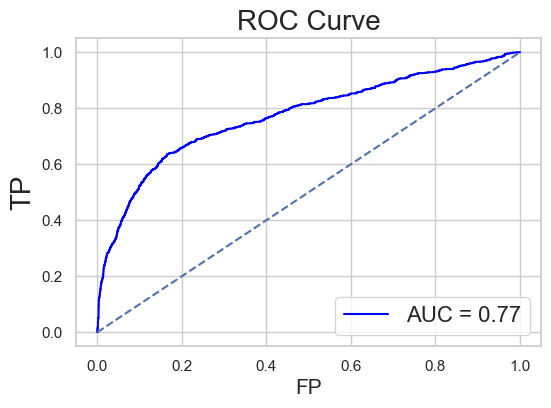

Fold 3:


100%|██████████| 2500/2500 [00:06<00:00, 387.63it/s]



Test Set Metrics:
TP: 689 FP: 2047 TN: 5142 FN: 279

Confusion Matrix:
[[5142 2047]
 [ 279  689]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7189
           1       0.25      0.71      0.37       968

    accuracy                           0.71      8157
   macro avg       0.60      0.71      0.59      8157
weighted avg       0.87      0.71      0.76      8157


Balanced Accuracy: 71.35 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39490 - 4837 = 34653


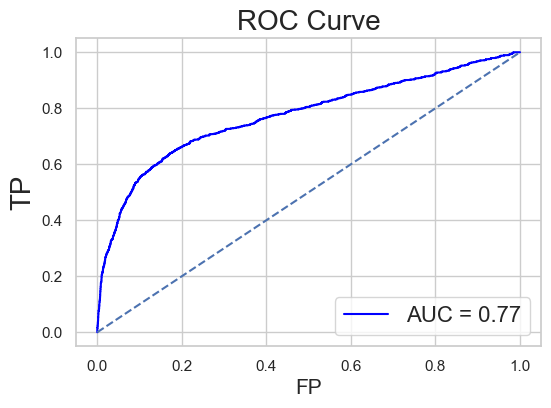

Fold 4:


100%|██████████| 2500/2500 [00:06<00:00, 385.42it/s]



Test Set Metrics:
TP: 624 FP: 2035 TN: 5222 FN: 276

Confusion Matrix:
[[5222 2035]
 [ 276  624]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7257
           1       0.23      0.69      0.35       900

    accuracy                           0.72      8157
   macro avg       0.59      0.71      0.58      8157
weighted avg       0.87      0.72      0.77      8157


Balanced Accuracy: 70.65 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38590 - 4795 = 33795


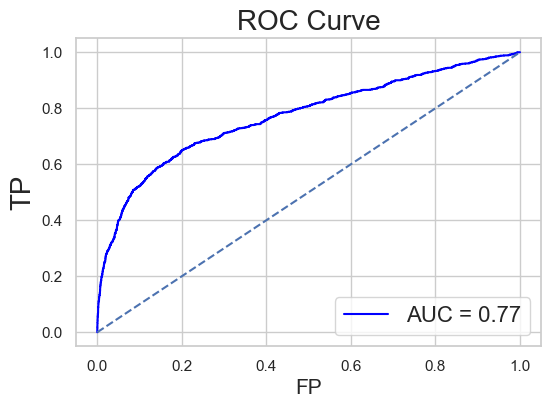

Fold 5:


100%|██████████| 2500/2500 [00:06<00:00, 372.50it/s]



Test Set Metrics:
TP: 633 FP: 2127 TN: 5164 FN: 232

Confusion Matrix:
[[5164 2127]
 [ 232  633]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.81      7291
           1       0.23      0.73      0.35       865

    accuracy                           0.71      8156
   macro avg       0.59      0.72      0.58      8156
weighted avg       0.88      0.71      0.76      8156


Balanced Accuracy: 72.0 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38480 - 4447 = 34033


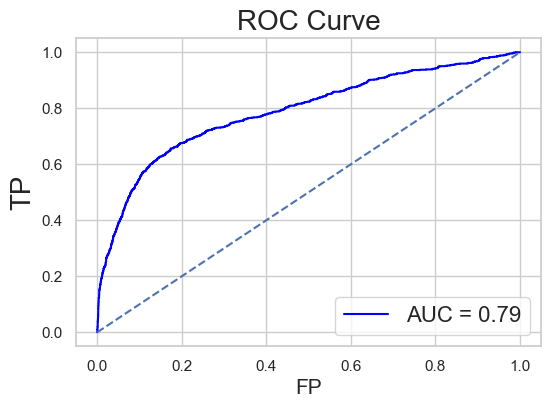

Fold 1:


100%|██████████| 2500/2500 [00:02<00:00, 1087.09it/s]



Test Set Metrics:
TP: 708 FP: 3160 TN: 4102 FN: 187

Confusion Matrix:
[[4102 3160]
 [ 187  708]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.71      7262
           1       0.18      0.79      0.30       895

    accuracy                           0.59      8157
   macro avg       0.57      0.68      0.50      8157
weighted avg       0.87      0.59      0.66      8157


Balanced Accuracy: 67.8 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 34670 - 5030 = 29640


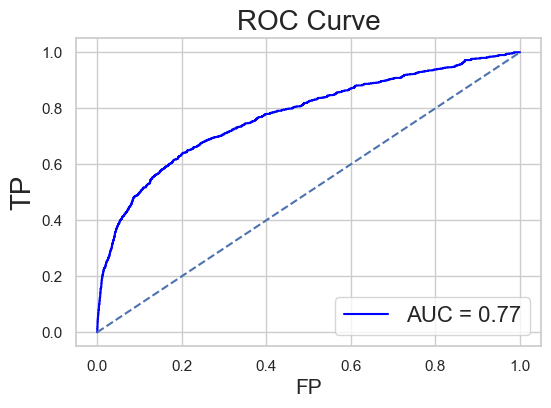

Fold 2:


100%|██████████| 2500/2500 [00:02<00:00, 1114.95it/s]



Test Set Metrics:
TP: 731 FP: 3088 TN: 4103 FN: 235

Confusion Matrix:
[[4103 3088]
 [ 235  731]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.57      0.71      7191
           1       0.19      0.76      0.31       966

    accuracy                           0.59      8157
   macro avg       0.57      0.66      0.51      8157
weighted avg       0.86      0.59      0.66      8157


Balanced Accuracy: 66.37 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 35135 - 5438 = 29697


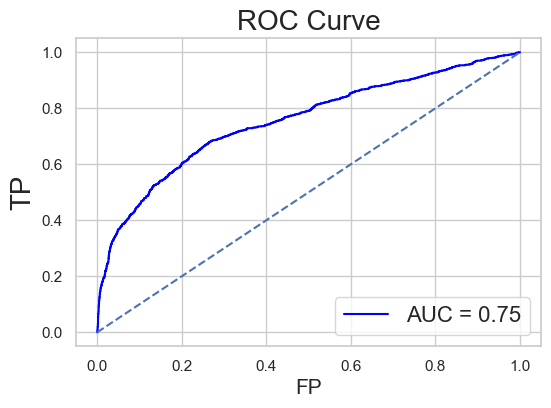

Fold 3:


100%|██████████| 2500/2500 [00:02<00:00, 1074.26it/s]



Test Set Metrics:
TP: 727 FP: 3069 TN: 4120 FN: 241

Confusion Matrix:
[[4120 3069]
 [ 241  727]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71      7189
           1       0.19      0.75      0.31       968

    accuracy                           0.59      8157
   macro avg       0.57      0.66      0.51      8157
weighted avg       0.86      0.59      0.66      8157


Balanced Accuracy: 66.21 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 35140 - 5479 = 29661


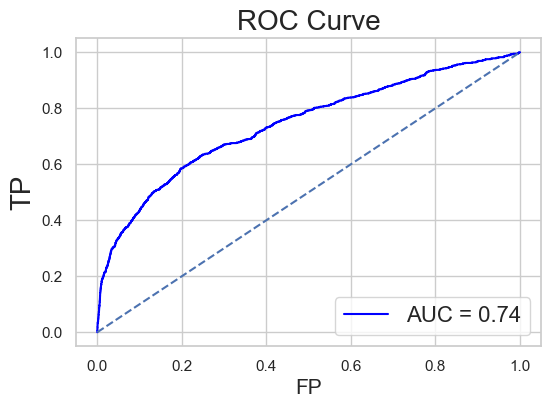

Fold 4:


100%|██████████| 2500/2500 [00:02<00:00, 1091.76it/s]



Test Set Metrics:
TP: 684 FP: 3168 TN: 4089 FN: 216

Confusion Matrix:
[[4089 3168]
 [ 216  684]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71      7257
           1       0.18      0.76      0.29       900

    accuracy                           0.59      8157
   macro avg       0.56      0.66      0.50      8157
weighted avg       0.86      0.59      0.66      8157


Balanced Accuracy: 66.17 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 34125 - 5328 = 28797


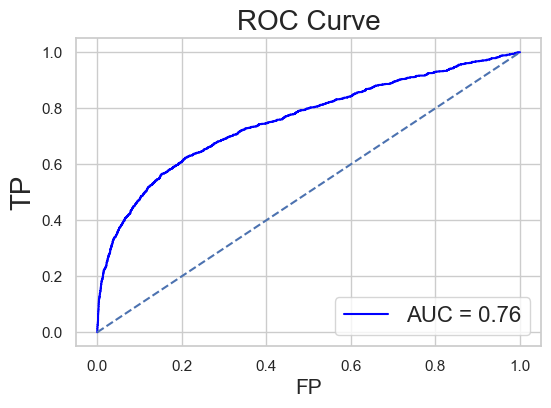

Fold 5:


100%|██████████| 2500/2500 [00:02<00:00, 1084.63it/s]



Test Set Metrics:
TP: 675 FP: 3238 TN: 4053 FN: 190

Confusion Matrix:
[[4053 3238]
 [ 190  675]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.70      7291
           1       0.17      0.78      0.28       865

    accuracy                           0.58      8156
   macro avg       0.56      0.67      0.49      8156
weighted avg       0.87      0.58      0.66      8156


Balanced Accuracy: 66.81 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 33765 - 5138 = 28627


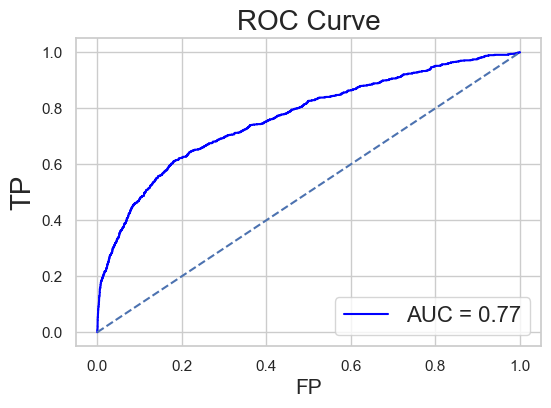

Fold 1:


100%|██████████| 2500/2500 [00:06<00:00, 384.79it/s]



Test Set Metrics:
TP: 626 FP: 2153 TN: 5109 FN: 269

Confusion Matrix:
[[5109 2153]
 [ 269  626]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81      7262
           1       0.23      0.70      0.34       895

    accuracy                           0.70      8157
   macro avg       0.59      0.70      0.57      8157
weighted avg       0.87      0.70      0.76      8157


Balanced Accuracy: 70.15 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38065 - 4843 = 33222


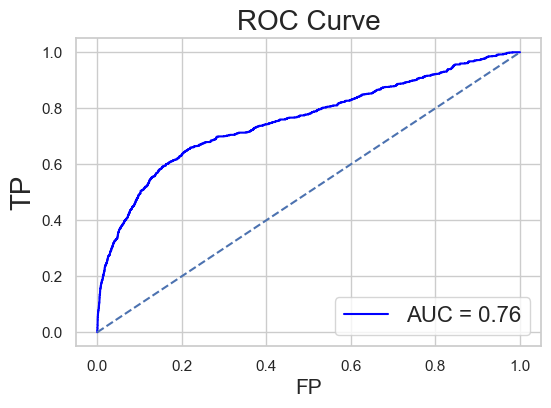

Fold 2:


100%|██████████| 2500/2500 [00:06<00:00, 377.00it/s]



Test Set Metrics:
TP: 669 FP: 2082 TN: 5109 FN: 297

Confusion Matrix:
[[5109 2082]
 [ 297  669]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81      7191
           1       0.24      0.69      0.36       966

    accuracy                           0.71      8157
   macro avg       0.59      0.70      0.59      8157
weighted avg       0.86      0.71      0.76      8157


Balanced Accuracy: 70.15 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38925 - 5052 = 33873


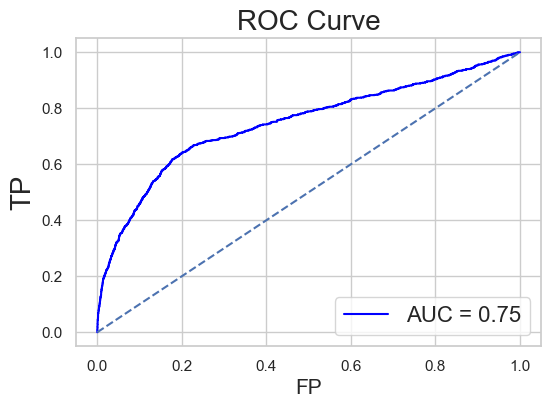

Fold 3:


100%|██████████| 2500/2500 [00:06<00:00, 386.73it/s]



Test Set Metrics:
TP: 684 FP: 2105 TN: 5084 FN: 284

Confusion Matrix:
[[5084 2105]
 [ 284  684]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81      7189
           1       0.25      0.71      0.36       968

    accuracy                           0.71      8157
   macro avg       0.60      0.71      0.59      8157
weighted avg       0.86      0.71      0.76      8157


Balanced Accuracy: 70.69 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39100 - 4945 = 34155


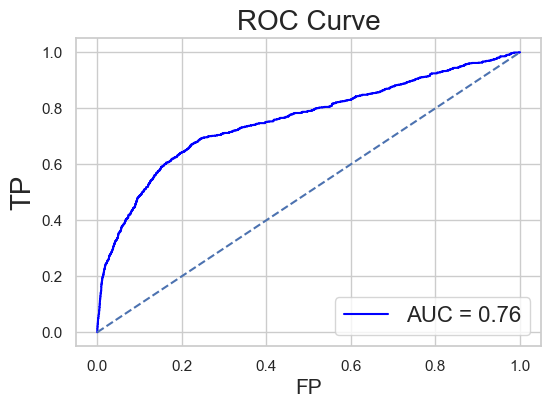

Fold 4:


100%|██████████| 2500/2500 [00:06<00:00, 388.47it/s]



Test Set Metrics:
TP: 609 FP: 2058 TN: 5199 FN: 291

Confusion Matrix:
[[5199 2058]
 [ 291  609]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7257
           1       0.23      0.68      0.34       900

    accuracy                           0.71      8157
   macro avg       0.59      0.70      0.58      8157
weighted avg       0.87      0.71      0.76      8157


Balanced Accuracy: 69.65 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38175 - 4968 = 33207


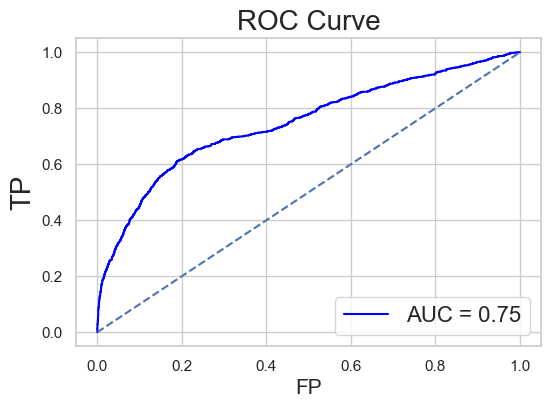

Fold 5:


100%|██████████| 2500/2500 [00:06<00:00, 379.08it/s]



Test Set Metrics:
TP: 622 FP: 2179 TN: 5112 FN: 243

Confusion Matrix:
[[5112 2179]
 [ 243  622]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81      7291
           1       0.22      0.72      0.34       865

    accuracy                           0.70      8156
   macro avg       0.59      0.71      0.57      8156
weighted avg       0.88      0.70      0.76      8156


Balanced Accuracy: 71.01 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 38000 - 4609 = 33391


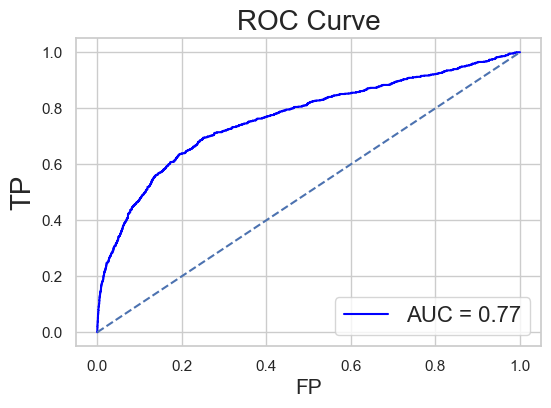

In [23]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.model_selection import train_test_split

class LogisticRegression:
        
    def __init__(self, X, y, learning_rate, epsilon, max_iterations):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iterations = max_iterations
        self.theta = None

    def split_data(self, resampling_strategy=None):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.25, random_state=42)
        
        if resampling_strategy == 'over':
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)
        elif resampling_strategy == 'under':
            rus = RandomUnderSampler(random_state=42)
            X_train, y_train = rus.fit_resample(X_train, y_train)
        elif resampling_strategy == 'smote':
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
        
        return X_train, X_test, y_train, y_test
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.theta)))

    def normalize_train(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std
        X = self.add_X0(X)
        return X, mean, std

    def normalize_test(self, X, mean, std):
        X = (X - mean) / std
        X = self.add_X0(X)
        return X

    def apply_smote(self, X, y):
        smote = SMOTE(random_state=11)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled

    def cost_function(self, X, y, ldpara):
        sig = self.sigmoid(X)
        pred = y * np.log(sig) + (1 - y) * np.log(1 - sig) 
        cost = pred.sum()
        reg_term = (ldpara / (2 * X.shape[0])) * np.sum(self.theta[1:]**2)
        return -cost + reg_term

    def cost_derivative(self, X, y, ldpara):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        reg_term = 2*(ldpara) * np.concatenate(([0], self.theta[1:]))
        return grad  + reg_term

    def confusion_matrix(self, X, y_true):
        y_pred = self.predict(X)
        cm = confusion_matrix(y_true, y_pred)
        return cm 

    def gradient_descent(self, X, y, ldpara, m):
        errors = []
        prev_error = float('inf')

        for i in tqdm(range(self.max_iterations)):
            regularized_term = (ldpara / m) * np.concatenate(([0], self.theta[1:]))
            self.theta = self.theta - self.learning_rate * (self.cost_derivative(X, y, ldpara) + regularized_term)
            error = self.cost_function(X, y, ldpara)
            diff = prev_error - error

            errors.append(abs(error))

            if diff < self.epsilon:
                print("Model stopped learning")
                break
        return errors

    def predict(self, X):
        return np.around(self.sigmoid(X))

    def predict_proba(self, X):
        return self.sigmoid(X)

    def run_model(self, ldpara=0, resampling_strategy=None):
        X_train, X_test, y_train, y_test = self.split_data(resampling_strategy)
        X_train, mean, std = self.normalize_train(X_train)
        X_test = self.normalize_test(X_test, mean, std)

        self.theta = np.ones(X_train.shape[1], dtype=np.float64)
        errors = self.gradient_descent(X_train, y_train, ldpara, X_train.shape[0])
        self.plot_cost(errors)
        self.metrics_calc(X_test, y_test)
        self.plot_roc(X_test, y_test)

    def run_kfold(self, k, ldpara, resampling_strategy=None):
        kf = KFold(n_splits=k, shuffle=True, random_state=11)
        fold_count = 1

        for train_idx, test_idx in kf.split(self.X):
            print(f"Fold {fold_count}:")

            X_train_fold, X_test_fold = self.X.iloc[train_idx], self.X.iloc[test_idx]
            y_train_fold, y_test_fold = self.y.iloc[train_idx], self.y.iloc[test_idx]

            # Apply resampling based on the chosen strategy
            if resampling_strategy == 'over':
                ros = RandomOverSampler(random_state=42)
                X_train_fold, y_train_fold = ros.fit_resample(X_train_fold, y_train_fold)
            elif resampling_strategy == 'under':
                rus = RandomUnderSampler(random_state=42)
                X_train_fold, y_train_fold = rus.fit_resample(X_train_fold, y_train_fold)
            elif resampling_strategy == 'smote':
                smote = SMOTE(random_state=42)
                X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

            X_train_fold, mean, std = self.normalize_train(X_train_fold)
            X_test_fold = self.normalize_test(X_test_fold, mean, std)

            self.theta = np.ones(X_train_fold.shape[1], dtype=np.float64)
            self.gradient_descent(X_train_fold, y_train_fold, ldpara, X_train_fold.shape[0])
            
            print("\nTest Set Metrics:")
            self.metrics_calc(X_test_fold, y_test_fold)
            self.plot_roc(X_test_fold, y_test_fold)

            fold_count += 1
            
    def metrics_calc(self, X, y, threshold=0.4):
        probabilities = self.predict_proba(X)
        adjusted_predictions = (probabilities >= threshold).astype(int)

        TP = np.sum((adjusted_predictions == 1) & (y == 1))
        FP = np.sum((adjusted_predictions == 1) & (y == 0))
        TN = np.sum((adjusted_predictions == 0) & (y == 0))
        FN = np.sum((adjusted_predictions == 0) & (y == 1))

        print("TP:", TP, "FP:", FP, "TN:", TN, "FN:", FN)
        cm = confusion_matrix(y, adjusted_predictions)
        print("\nConfusion Matrix:")
        print(cm)
        print('\nClassification report:\n', classification_report(y, adjusted_predictions))
        balanced_acc = balanced_accuracy_score(y, adjusted_predictions)
        print("\nBalanced Accuracy:", round(balanced_acc*100, 2), "%")
        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN) 
        print("\nLet's assume a small cost analysis where we have the following")
        print(f"\n Costs and benefits: Cfp =  {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"\n Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {TB - TC}" )

    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iterations', ylabel='Cost', title='Cost Trend')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()

    def plot_roc(self, X_test, y_test):
        fig, ax = plt.subplots(figsize=(6, 4))

        preds = self.predict_proba(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)

        ax.plot(fpr, tpr, 'blue', label='AUC = {:.2f}'.format(roc_auc))
        ax.plot([0, 1], [0, 1], '--')
        ax.set_title('ROC Curve', fontsize=20)
        ax.set_ylabel('TP', fontsize=20)
        ax.set_xlabel('FP', fontsize=15)
        ax.legend(loc='lower right', prop={'size': 16})
        plt.show()

    def bias_var_plot(self, sample_sizes, resampling_strategy=None):
        biases = []
        variances = []

        for size in sample_sizes:
            size = int(size)  # Convert to integer

            print(f"Sample Size: {size}")

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                self.X, self.y, train_size=size, test_size=0.25, random_state=42
            )

            # Apply resampling strategy
            if resampling_strategy == 'over':
                ros = RandomOverSampler(random_state=42)
                X_train, y_train = ros.fit_resample(X_train, y_train)
            elif resampling_strategy == 'under':
                rus = RandomUnderSampler(random_state=42)
                X_train, y_train = rus.fit_resample(X_train, y_train)
            elif resampling_strategy == 'smote':
                smote = SMOTE(random_state=42)
                X_train, y_train = smote.fit_resample(X_train, y_train)
                

            # Normalize data
            X_train, mean, std = self.normalize_train(X_train)
            X_test = self.normalize_test(X_test, mean, std)

            # Train model
            self.theta = np.ones(X_train.shape[1], dtype=np.float64)
            self.gradient_descent(X_train, y_train, ldpara=0, m=X_train.shape[0])

            # Evaluate model
            bias, variance = self.calculate_bv(X_test, y_test)
            biases.append(bias)
            variances.append(variance)

        # Plotting
        plt.plot(sample_sizes, biases, marker='o', label = 'Bias')
        plt.plot(sample_sizes, variances, marker='o', label='Variance')
        plt.xlabel('Sample Size')
        plt.ylabel('Bias Metric')
        plt.title('Bias Plot over Sample Sizes')
        plt.legend(loc='upper right', prop={'size': 16})
        plt.show()

        print("Bias^2:", biases)
        print("Variance:", variances)

    def calculate_bv(self, X, y):
        y_pred = self.predict(X)
        bias = np.mean((y_pred - y) ** 2)
        variance = np.var(y_pred)
        return bias, variance

# Use the input data after preprocessing and feature engineering/selection
X = encoded_bank_data.drop('y', axis=1)  # Features from encoded_bank_data
y = encoded_bank_data['y']               # Target from encoded_bank_data

# Created a LogisticRegression class instance
lr = LogisticRegression(X, y, learning_rate=0.1e-5, epsilon=0.00005, max_iterations=2500)

# Using different resampling strategies to run the model
lr.run_model(ldpara = 0)  # Run without resampling
lr.run_model(ldpara = 0, resampling_strategy='over')  # Run with over-sampling
lr.run_model(ldpara = 0, resampling_strategy='under')  # Run with under-sampling
lr.run_model(ldpara = 0, resampling_strategy='smote')  # Run with SMOTE


# # Using different resampling strategies to run the model for KFold
num_splits = 5  # 5 splits 
lr.run_kfold(num_splits, ldpara=0, resampling_strategy=None)   # Run KFold without resampling
lr.run_kfold(num_splits, ldpara=0, resampling_strategy='over') # Run KFold with over-sampling
lr.run_kfold(num_splits, ldpara=0, resampling_strategy='under')# Run KFold with under-sampling
lr.run_kfold(num_splits, ldpara=0, resampling_strategy='smote')# Run KFold with SMOTE


**Bias - Variance Tradeoff**
- Implemented on dataset that has been sampled using SMOTE
- Sample sizes are chosen and the bias and variance are calculate with the predicted and actual values
- The values are then shown in a line chart manner depicting change with each iteration

*Observations* - 
- Model starts out with high bias and with more samples included in training, reduction is seen in bias
- Bias reducing indicated an improvement in accuracy to capture intricate patterns in the data
- Variance reducing slightly depicted consistency in predictions without major fluctuations
- SMOTE plays an important factor here in increasing the minority class and in turn is important 
in our use case to focus on minority class and not missing out on false negatives and improving true negative predictions

Sample Size: 1000


  0%|          | 0/2500 [00:00<?, ?it/s]

100%|██████████| 2500/2500 [00:01<00:00, 1337.96it/s]


Sample Size: 1500


100%|██████████| 2500/2500 [00:01<00:00, 1301.38it/s]


Sample Size: 2000


100%|██████████| 2500/2500 [00:02<00:00, 1246.62it/s]


Sample Size: 2500


100%|██████████| 2500/2500 [00:02<00:00, 1186.57it/s]


Sample Size: 3000


100%|██████████| 2500/2500 [00:02<00:00, 1170.19it/s]


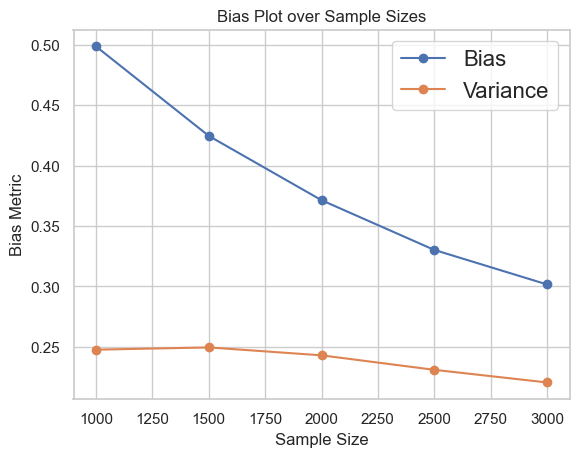

Bias^2: [0.49843075715967045, 0.42448018830914086, 0.37132208709297765, 0.3302275402118478, 0.3016869360533543]
Variance: [0.24773731642852267, 0.24961137345532458, 0.24306644880006642, 0.2310924014078861, 0.2206420209403729]


In [24]:
# Bias Variance with different sample sizes

sample_sizes = [1000, 1500, 2000, 2500, 3000]  # Example sample sizes
lr.bias_var_plot(sample_sizes, resampling_strategy='smote')

**Gaussian Naive Bayes Class**
- Probabilities for each class is calculated using the fitted distributions and prior probabilities, class is assigned to which ever is
 higher probability 
- Classification report and confusion matrix to help make inferences and a small cost analysis
- ROC plot depicting the Area under the curve with baseline simple model that is a random model 
- Model is implemented to run with different sampling techniques

Balanced accuracy: 0.6363599939999685
Confusion Matrix:
 [[8253  827]
 [ 710  406]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      9080
           1       0.33      0.36      0.35      1116

    accuracy                           0.85     10196
   macro avg       0.63      0.64      0.63     10196
weighted avg       0.86      0.85      0.85     10196



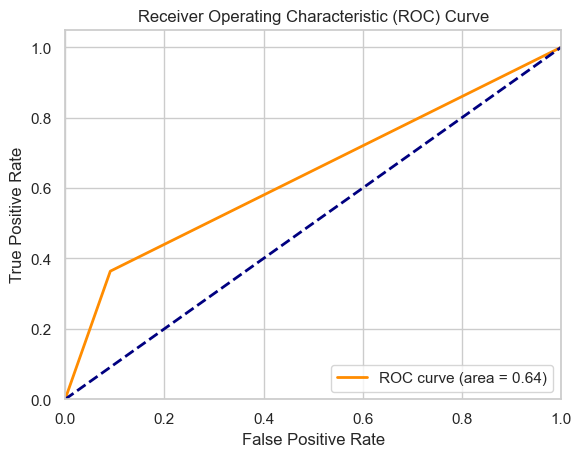

Balanced accuracy: 0.6724146574455655
Confusion Matrix:
 [[7907 1173]
 [ 587  529]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      9080
           1       0.31      0.47      0.38      1116

    accuracy                           0.83     10196
   macro avg       0.62      0.67      0.64     10196
weighted avg       0.86      0.83      0.84     10196



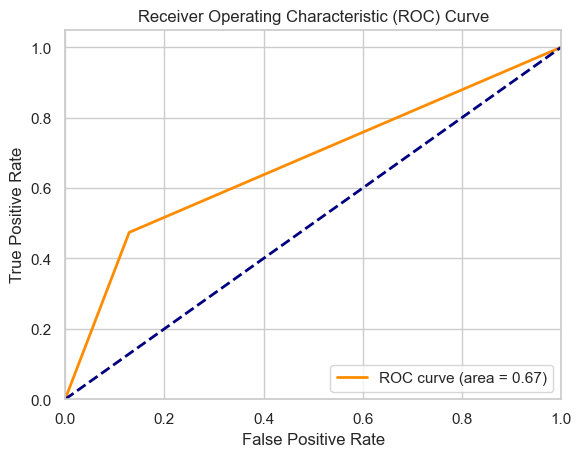

Balanced accuracy: 0.6663950862899278
Confusion Matrix:
 [[7936 1144]
 [ 604  512]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      9080
           1       0.31      0.46      0.37      1116

    accuracy                           0.83     10196
   macro avg       0.62      0.67      0.64     10196
weighted avg       0.86      0.83      0.84     10196



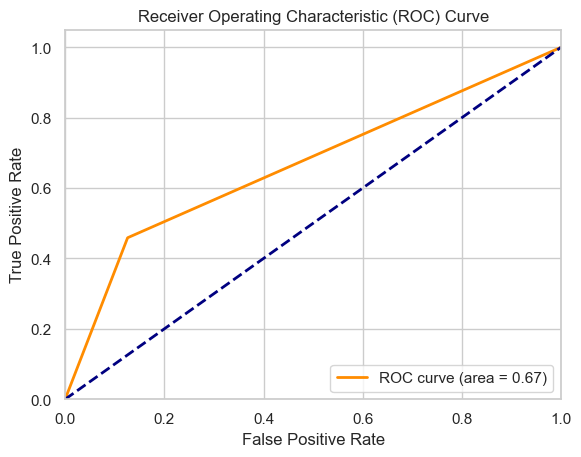

Balanced accuracy: 0.6699315522713277
Confusion Matrix:
 [[7748 1332]
 [ 573  543]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      9080
           1       0.29      0.49      0.36      1116

    accuracy                           0.81     10196
   macro avg       0.61      0.67      0.63     10196
weighted avg       0.86      0.81      0.83     10196



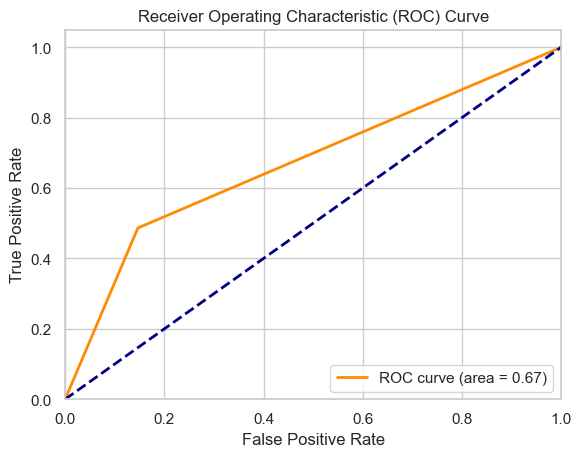

In [25]:
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, balanced_accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pandas as pd

class GaussianNaiveBayes:

    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y

    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean,std)
        return dist

    def probability(self, X, dist, prior):
        prob = prior
        count = 0
        for each in dist:
          prob = prob * each.pdf(X[count])
          count +=1
        return prob

    def fit(self, resampling_strategy=None):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.25, random_state=18)

        # Resampling
        if resampling_strategy:
            if resampling_strategy == 'over':
                ros = RandomOverSampler(random_state=42)
                X_train, y_train = ros.fit_resample(X_train, y_train)
            elif resampling_strategy == 'under':
                rus = RandomUnderSampler(random_state=42)
                X_train, y_train = rus.fit_resample(X_train, y_train)
            elif resampling_strategy == 'smote':
                smote = SMOTE(random_state=42)
                X_train, y_train = smote.fit_resample(X_train, y_train)


        # Convert to NumPy arrays if they are pandas objects
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values


        # Separate the dataset by class
        X0_train = X_train[y_train == 0]
        X1_train = X_train[y_train == 1]

        prior_0 = len(X0_train) / len(X_train)
        prior_1 = len(X1_train) / len(X_train)

        dist0 = [self.fitDistribution(X0_train[:, i]) for i in range(X_train.shape[1])]
        dist1 = [self.fitDistribution(X1_train[:, i]) for i in range(X_train.shape[1])]

        # Assign test set and distributions to instance variables
        self.X_test = X_test
        self.y_test = y_test
        self.dist0 = dist0
        self.dist1 = dist1
        self.prior_0 = prior_0
        self.prior_1 = prior_1

        # Now use the predict method for predictions
        actual = self.y_test
        pred = self.predict(self.X_test)

        print('Balanced accuracy:', balanced_accuracy_score(actual, pred))
        print('Confusion Matrix:\n', confusion_matrix(actual, pred))
        print('\nClassification Report:\n', classification_report(actual, pred))


        fpr, tpr, _ = roc_curve(actual, pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    def predict(self, X):
      pred = []
      for sample in X:
        py0 = self.probability(sample, self.dist0, self.prior_0)
        py1 = self.probability(sample, self.dist1, self.prior_1)
        y_predict = np.argmax([py0, py1])
        pred.append(y_predict)
      return pred


# Use data after preprocessing and feature engineering/selection
X = encoded_bank_data.drop('y', axis=1)
y = encoded_bank_data['y']

# Instantiate a Gaussian Naive Bayes model and pass X and y
gnb = GaussianNaiveBayes(X, y)

# Run the model without resampling, and with resampling techniques
gnb.fit()
gnb.fit(resampling_strategy='over')
gnb.fit(resampling_strategy='under')
gnb.fit(resampling_strategy='smote')


**Gaussian Naive Bayes with KFold evalutation**
- KFold GNB implementation 
- Evaluation is done for different sampling techniques along with plotting the ROC curves and a small cost analysis


KFold without resampling:
Fold 1:
Balanced accuracy: 0.6388466633535862
Confusion Matrix:
 [[6601  661]
 [ 565  330]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7262
           1       0.33      0.37      0.35       895

    accuracy                           0.85      8157
   macro avg       0.63      0.64      0.63      8157
weighted avg       0.86      0.85      0.85      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39605 - 6311 = 33294


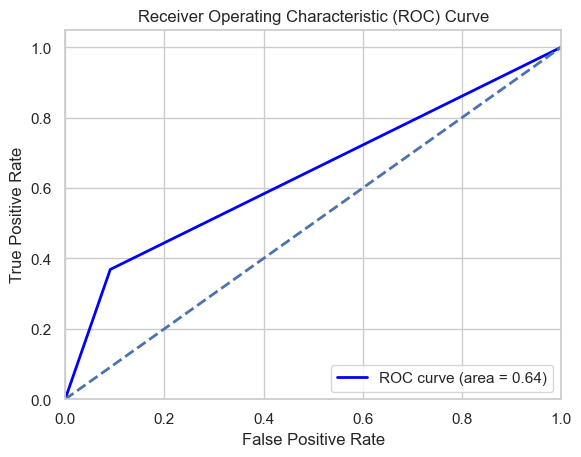

Fold 2:
Balanced accuracy: 0.6335615343886553
Confusion Matrix:
 [[6566  625]
 [ 624  342]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7191
           1       0.35      0.35      0.35       966

    accuracy                           0.85      8157
   macro avg       0.63      0.63      0.63      8157
weighted avg       0.85      0.85      0.85      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39670 - 6865 = 32805


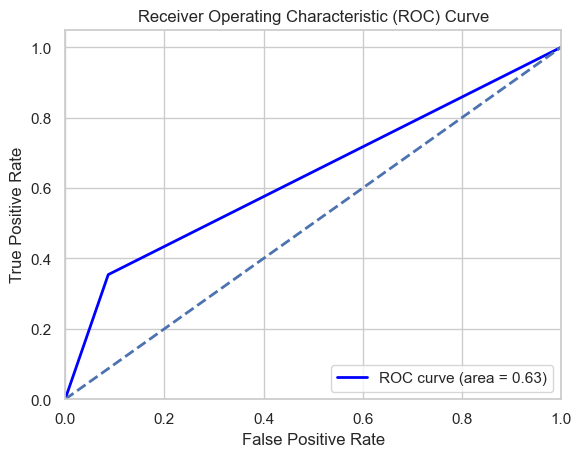

Fold 3:
Balanced accuracy: 0.625057408069491
Confusion Matrix:
 [[6514  675]
 [ 635  333]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7189
           1       0.33      0.34      0.34       968

    accuracy                           0.84      8157
   macro avg       0.62      0.63      0.62      8157
weighted avg       0.84      0.84      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39230 - 7025 = 32205


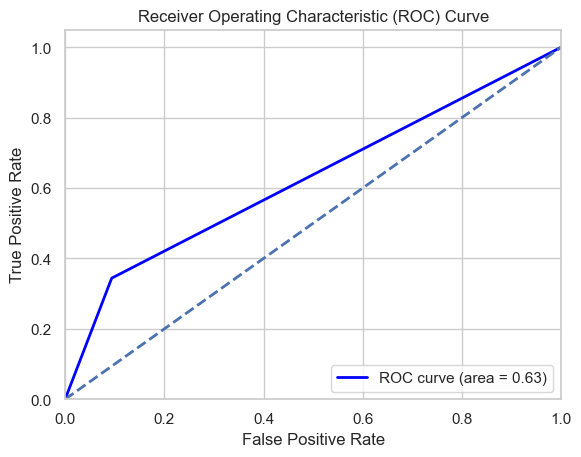

Fold 4:
Balanced accuracy: 0.639444674107758
Confusion Matrix:
 [[6620  637]
 [ 570  330]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7257
           1       0.34      0.37      0.35       900

    accuracy                           0.85      8157
   macro avg       0.63      0.64      0.63      8157
weighted avg       0.86      0.85      0.85      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39700 - 6337 = 33363


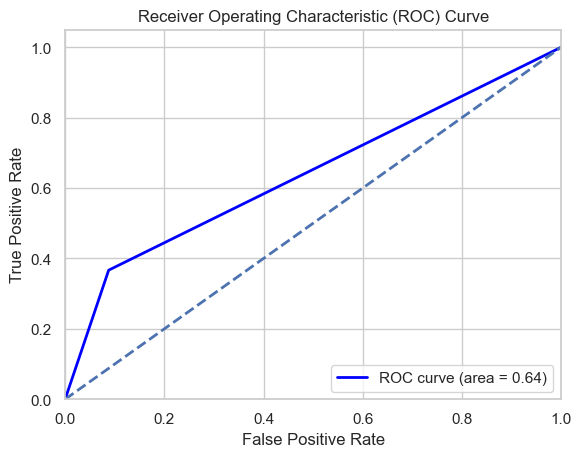

Fold 5:
Balanced accuracy: 0.632891053424802
Confusion Matrix:
 [[6599  692]
 [ 553  312]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7291
           1       0.31      0.36      0.33       865

    accuracy                           0.85      8156
   macro avg       0.62      0.63      0.62      8156
weighted avg       0.86      0.85      0.85      8156


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39235 - 6222 = 33013


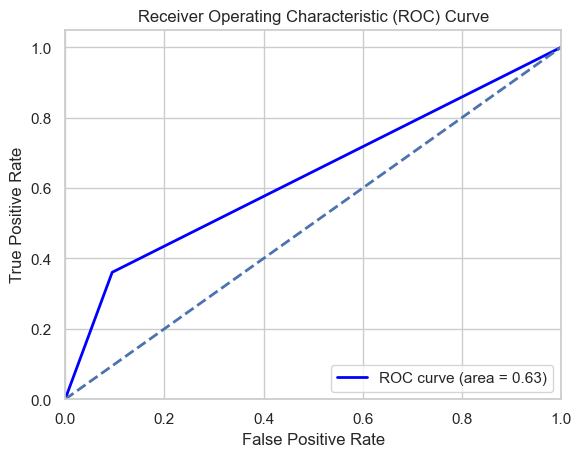


KFold with over-sampling:
Fold 1:
Balanced accuracy: 0.6840284391544568
Confusion Matrix:
 [[6316  946]
 [ 449  446]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7262
           1       0.32      0.50      0.39       895

    accuracy                           0.83      8157
   macro avg       0.63      0.68      0.65      8157
weighted avg       0.87      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40500 - 5436 = 35064


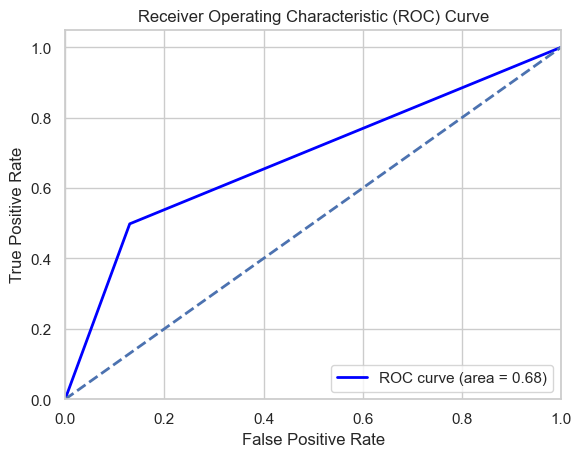

Fold 2:
Balanced accuracy: 0.6738482627093391
Confusion Matrix:
 [[6267  924]
 [ 506  460]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7191
           1       0.33      0.48      0.39       966

    accuracy                           0.82      8157
   macro avg       0.63      0.67      0.64      8157
weighted avg       0.86      0.82      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40535 - 5984 = 34551


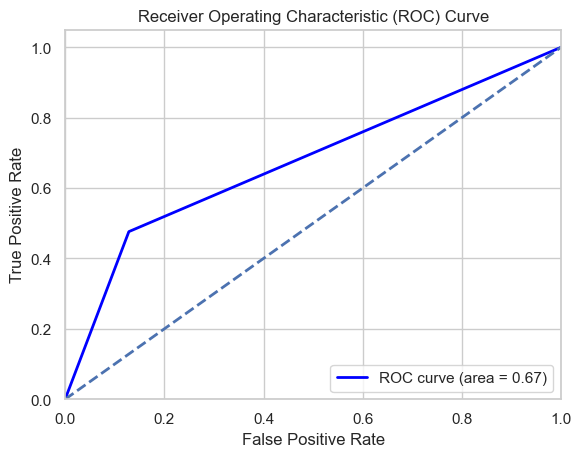

Fold 3:
Balanced accuracy: 0.6717990726189806
Confusion Matrix:
 [[6280  909]
 [ 513  455]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      7189
           1       0.33      0.47      0.39       968

    accuracy                           0.83      8157
   macro avg       0.63      0.67      0.64      8157
weighted avg       0.85      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40500 - 6039 = 34461


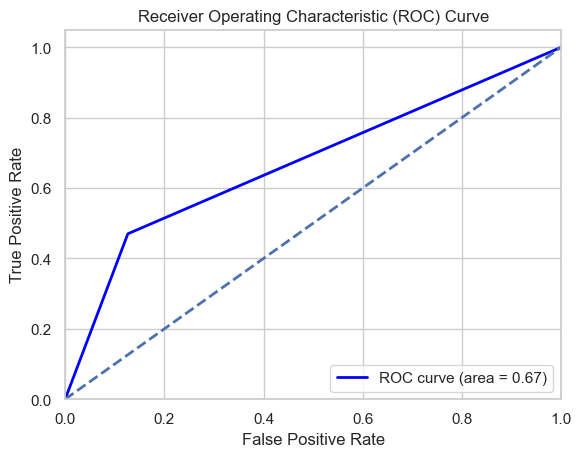

Fold 4:
Balanced accuracy: 0.6689127738735015
Confusion Matrix:
 [[6322  935]
 [ 480  420]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7257
           1       0.31      0.47      0.37       900

    accuracy                           0.83      8157
   macro avg       0.62      0.67      0.64      8157
weighted avg       0.86      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40010 - 5735 = 34275


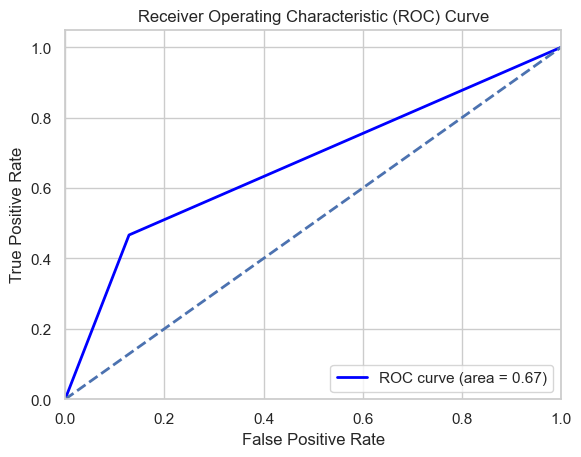

Fold 5:
Balanced accuracy: 0.6720218846102923
Confusion Matrix:
 [[6293  998]
 [ 449  416]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90      7291
           1       0.29      0.48      0.37       865

    accuracy                           0.82      8156
   macro avg       0.61      0.67      0.63      8156
weighted avg       0.87      0.82      0.84      8156


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39785 - 5488 = 34297


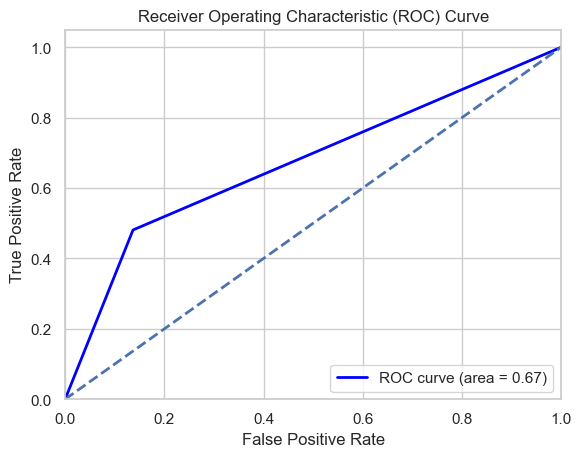


KFold with under-sampling:
Fold 1:
Balanced accuracy: 0.6832100672514305
Confusion Matrix:
 [[6296  966]
 [ 448  447]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7262
           1       0.32      0.50      0.39       895

    accuracy                           0.83      8157
   macro avg       0.62      0.68      0.64      8157
weighted avg       0.87      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40420 - 5446 = 34974


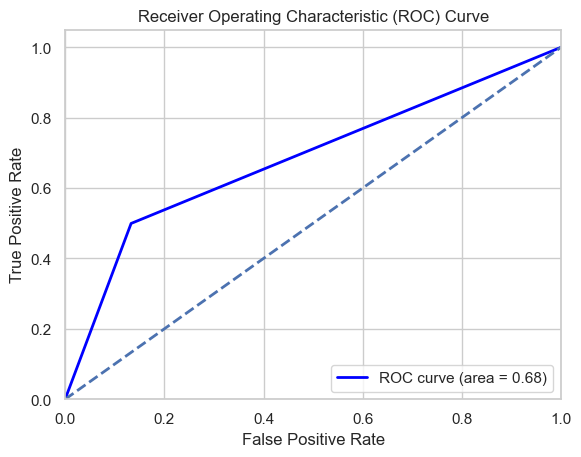

Fold 2:
Balanced accuracy: 0.6657908306708438
Confusion Matrix:
 [[6300  891]
 [ 526  440]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7191
           1       0.33      0.46      0.38       966

    accuracy                           0.83      8157
   macro avg       0.63      0.67      0.64      8157
weighted avg       0.85      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40300 - 6151 = 34149


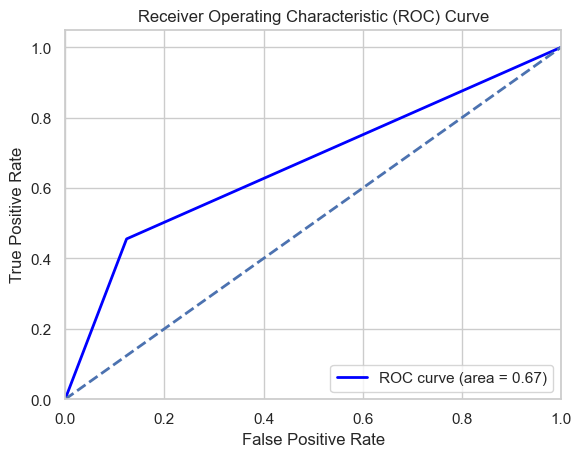

Fold 3:
Balanced accuracy: 0.660405762246959
Confusion Matrix:
 [[6287  902]
 [ 536  432]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      7189
           1       0.32      0.45      0.38       968

    accuracy                           0.82      8157
   macro avg       0.62      0.66      0.64      8157
weighted avg       0.85      0.82      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40075 - 6262 = 33813


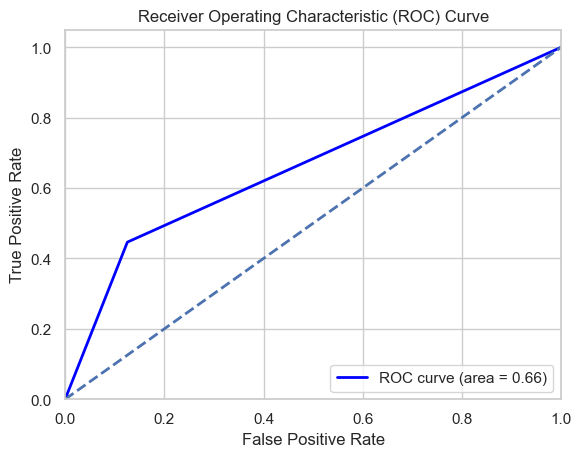

Fold 4:
Balanced accuracy: 0.6697439254053558
Confusion Matrix:
 [[6326  931]
 [ 479  421]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7257
           1       0.31      0.47      0.37       900

    accuracy                           0.83      8157
   macro avg       0.62      0.67      0.64      8157
weighted avg       0.86      0.83      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40050 - 5721 = 34329


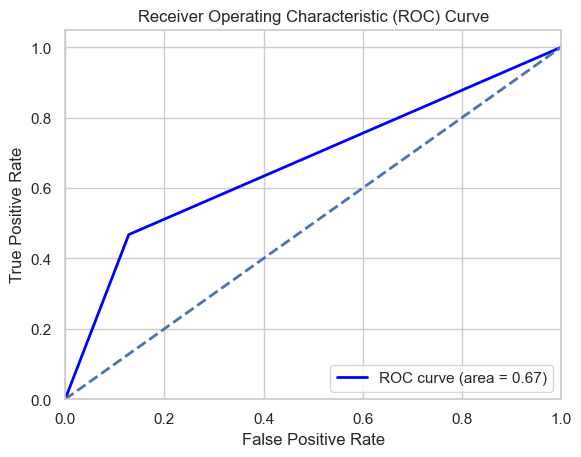

Fold 5:
Balanced accuracy: 0.6665844262821453
Confusion Matrix:
 [[6298  993]
 [ 459  406]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90      7291
           1       0.29      0.47      0.36       865

    accuracy                           0.82      8156
   macro avg       0.61      0.67      0.63      8156
weighted avg       0.86      0.82      0.84      8156


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 39610 - 5583 = 34027


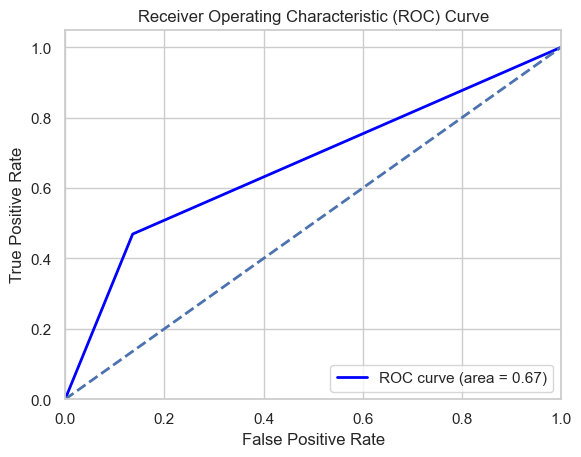


KFold with SMOTE:
Fold 1:
Balanced accuracy: 0.7015944327939577
Confusion Matrix:
 [[6206 1056]
 [ 404  491]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      7262
           1       0.32      0.55      0.40       895

    accuracy                           0.82      8157
   macro avg       0.63      0.70      0.65      8157
weighted avg       0.87      0.82      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40850 - 5096 = 35754


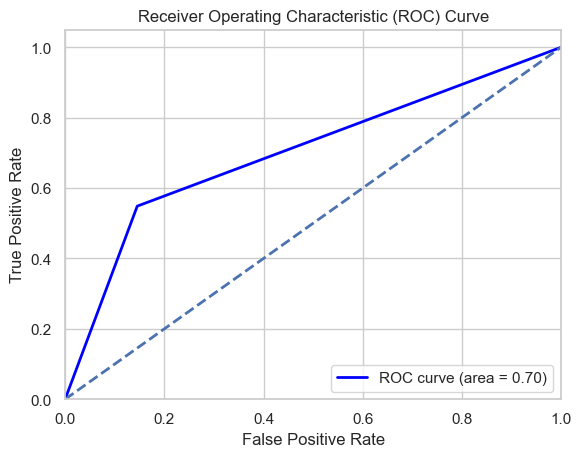

Fold 2:
Balanced accuracy: 0.6932695372320992
Confusion Matrix:
 [[6189 1002]
 [ 458  508]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      7191
           1       0.34      0.53      0.41       966

    accuracy                           0.82      8157
   macro avg       0.63      0.69      0.65      8157
weighted avg       0.86      0.82      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 41105 - 5582 = 35523


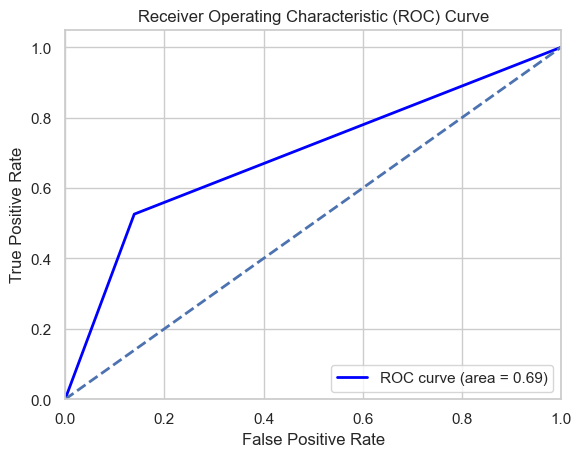

Fold 3:
Balanced accuracy: 0.6882556453902829
Confusion Matrix:
 [[6123 1066]
 [ 460  508]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      7189
           1       0.32      0.52      0.40       968

    accuracy                           0.81      8157
   macro avg       0.63      0.69      0.64      8157
weighted avg       0.86      0.81      0.83      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40775 - 5666 = 35109


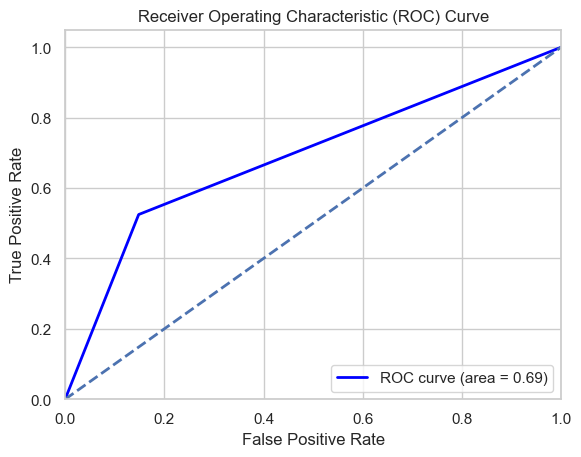

Fold 4:
Balanced accuracy: 0.6946933994763677
Confusion Matrix:
 [[6164 1093]
 [ 414  486]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      7257
           1       0.31      0.54      0.39       900

    accuracy                           0.82      8157
   macro avg       0.62      0.69      0.64      8157
weighted avg       0.87      0.82      0.84      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40540 - 5233 = 35307


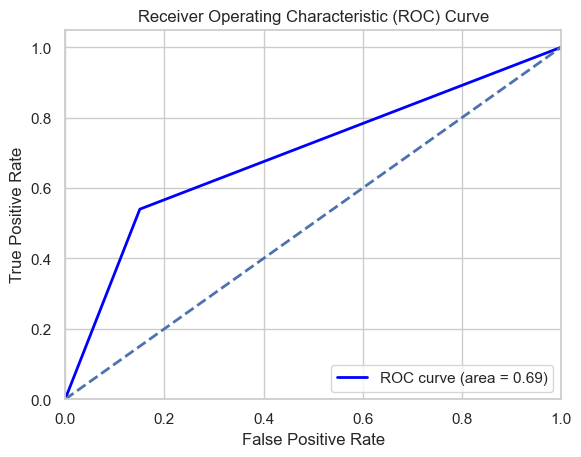

Fold 5:
Balanced accuracy: 0.6956039713226299
Confusion Matrix:
 [[6207 1084]
 [ 398  467]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      7291
           1       0.30      0.54      0.39       865

    accuracy                           0.82      8156
   macro avg       0.62      0.70      0.64      8156
weighted avg       0.87      0.82      0.84      8156


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 40375 - 5064 = 35311


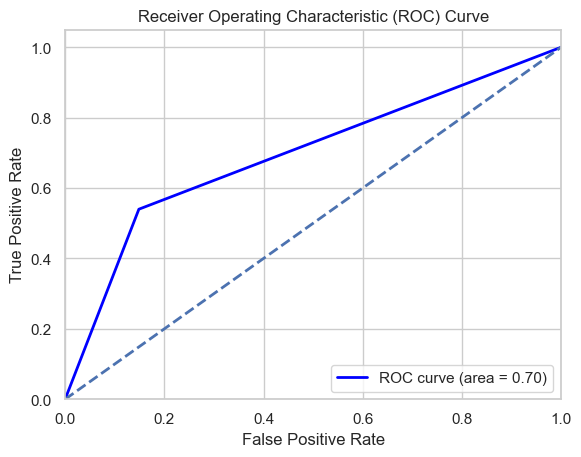

In [26]:
# KFold

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt

class KFGaussianNaiveBayes:

    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y

    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        return dist

    def probability(self, X, dist, prior):
        prob = prior
        count = 0
        for each in dist:
          prob = prob * each.pdf(X[count])
          count += 1
        return prob

    def fit_kfold(self, n_splits=5, resampling_strategy=None):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=11)

        for fold, (train_idx, test_idx) in enumerate(kf.split(self.X)):
            print(f"Fold {fold + 1}:")

            X_train_fold, X_test_fold = self.X[train_idx], self.X[test_idx]
            y_train_fold, y_test_fold = self.y[train_idx], self.y[test_idx]

            # Apply resampling based on the chosen strategy
            if resampling_strategy == 'over':
                ros = RandomOverSampler(random_state=42)
                X_train_fold, y_train_fold = ros.fit_resample(X_train_fold, y_train_fold)
            elif resampling_strategy == 'under':
                rus = RandomUnderSampler(random_state=42)
                X_train_fold, y_train_fold = rus.fit_resample(X_train_fold, y_train_fold)
            elif resampling_strategy == 'smote':
                smote = SMOTE(random_state=42)
                X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)


            # Fit the model on the fold data
            self.fit_model(X_train_fold, y_train_fold, X_test_fold, y_test_fold)

    def fit_model(self, X_train, y_train, X_test, y_test):
        X0_train = X_train[y_train == 0]
        X1_train = X_train[y_train == 1]

        prior_0 = len(X0_train) / len(X_train)
        prior_1 = len(X1_train) / len(X_train)

        dist0 = [self.fitDistribution(X0_train[:, i]) for i in range(X_train.shape[1])]
        dist1 = [self.fitDistribution(X1_train[:, i]) for i in range(X_train.shape[1])]

        pred = self.predict(X_test, dist0, dist1, prior_0, prior_1)
        print('Balanced accuracy:', balanced_accuracy_score(y_test, pred))
        print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, pred))
        print('\nClassification report:\n', classification_report(y_test, pred))

        mat = metrics.confusion_matrix(y_test, pred)
        TP = mat[1, 1]
        FP = mat[0, 1]
        TN = mat[0, 0]
        FN = mat[1, 0]

        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5

        # Calculate Total Cost (TC) and Total Benefit (TB)
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN)

        print("\nLet's assume a small cost analysis where we have the following")
        print(f"\n Costs and benefits: Cfp = {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"\n Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {TB - TC}")


        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()


    def predict(self, X, dist0, dist1, prior_0, prior_1):
        pred = []
        for sample in X:
            py0 = self.probability(sample, dist0, prior_0)
            py1 = self.probability(sample, dist1, prior_1)
            y_predict = np.argmax([py0, py1])
            pred.append(y_predict)
        return pred

# Use the data after preprocessing and feature engineering/selection
X = encoded_bank_data.drop('y', axis=1).values
y = encoded_bank_data['y'].values

# Instantiate the Gaussian Naive Bayes model
kfgnb = KFGaussianNaiveBayes(X, y)

# Run KFold cross-validation with different resampling strategies
print("KFold without resampling:")
kfgnb.fit_kfold()

print("\nKFold with over-sampling:")
kfgnb.fit_kfold(resampling_strategy='over')

print("\nKFold with under-sampling:")
kfgnb.fit_kfold(resampling_strategy='under')

print("\nKFold with SMOTE:")
kfgnb.fit_kfold(resampling_strategy='smote')


**Soft Margin SVM using Sequential Minimal Optimization**
- This implementation of the SVM is based off the paper by John Platt
- Utilizes the Radial Basis Function (RBF) as the kernel for non-linear decision boundaries
- As seen in previous models, the model is also equipped with sampling techniques
- The pairs of Lagrange multipliers are optimzed to find the optimal decision boundary 
- KKT conditions are checked for convergence 

In [34]:
# Soft Margin SVM using SMO
# Kernel trick - Radial basis function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


class NonLinearSVM:
    def __init__(self, X, y, C=1.0, gamma=1.0, tol=1e-3, max_iter=100):
        self.X = X
        self.y = y
        self.C = C
        self.gamma = gamma
        self.tol = tol
        self.max_iter = max_iter

    def rbf_kernel(self, X1, X2):
        return np.exp(-self.gamma * np.linalg.norm(X1 - X2) ** 2)

    def fit(self):
        n_samples, n_features = self.X.shape

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.rbf_kernel(self.X[i], self.X[j])

        alpha = np.zeros(n_samples)
        b = 0.0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                # predicted class label
                f_i = np.sum(alpha * self.y * K[i, :]) + b
                # error
                E_i = f_i - self.y[i]

                if (self.y[i] * E_i < -self.tol and alpha[i] < self.C) or (self.y[i] * E_i > self.tol and alpha[i] > 0):
                    # j != i
                    j = i
                    while j == i:
                        j = np.random.randint(n_samples)

                    # Calculate predicted class label j and Error j
                    f_j = np.sum(alpha * self.y * K[j, :]) + b
                    E_j = f_j - self.y[j]

                    # Store the old values of alpha i and alpha j
                    alpha_i_old = alpha[i]
                    alpha_j_old = alpha[j]

                    # Compute L and H, the bounds on new possible alpha values as stated in SMO Paper
                    if self.y[i] != self.y[j]:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(self.C, self.C + alpha[j] - alpha[i])
                    else:
                        L = max(0, alpha[i] + alpha[j] - self.C)
                        H = min(self.C, alpha[i] + alpha[j])

                    if L == H:
                        continue

                    # Compute eta between data points i and j and check if >=0
                    eta = 2 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue

                    # Compute for alpha j 
                    alpha[j] = alpha[j] - (self.y[j] * (E_i - E_j)) / eta
                    alpha[j] = max(L, min(H, alpha[j]))

                    # Check if alpha j conditions
                    if np.abs(alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Update alpha i
                    alpha[i] = alpha[i] + self.y[i] * self.y[j] * (alpha_j_old - alpha[j])

                    # Check Bias terms conditions and update accordingly
                    b1 = b - E_i - self.y[i] * (alpha[i] - alpha_i_old) * K[i, i] - \
                         self.y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                    b2 = b - E_j - self.y[i] * (alpha[i] - alpha_i_old) * K[i, j] - \
                         self.y[j] * (alpha[j] - alpha_j_old) * K[j, j]

                    # Update bias term
                    if 0 < alpha[i] < self.C:
                        b = b1
                    elif 0 < alpha[j] < self.C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2

        # Save the support vectors and corresponding labels
        self.support_vectors = self.X[alpha > 1e-5]
        self.support_labels = self.y[alpha > 1e-5]
        self.alpha = alpha[alpha > 1e-5]
        self.b = b

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha, support_label, support_vector in zip(self.alpha, self.support_labels, self.support_vectors):
                s += alpha * support_label * self.rbf_kernel(X[i], support_vector)
            y_pred[i] = np.sign(s + self.b)
        return y_pred

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        acc = np.mean(y_pred == y)
        return acc

    def run_model(self, X_test, y_test, resampling_strategy=None):
        # Apply preprocessing and resampling based on the chosen strategy
        if resampling_strategy == 'over':
            ros = RandomOverSampler(random_state=42)
            self.X, self.y = ros.fit_resample(self.X, self.y)
        elif resampling_strategy == 'under':
            rus = RandomUnderSampler(random_state=42)
            self.X, self.y = rus.fit_resample(self.X, self.y)
        elif resampling_strategy == 'smote':
            smote = SMOTE(random_state=42)
            self.X, self.y = smote.fit_resample(self.X, self.y)

        self.fit()
        acc_train = self.accuracy(self.X, self.y)
        acc_test = self.accuracy(X_test, y_test)

        print("Training Accuracy:", round(acc_train * 100, 2), "%")
        print("Test Accuracy:", round(acc_test * 100, 2), "%")

        y_pred_test = self.predict(X_test)
        report = classification_report(y_test, y_pred_test)
        print("Classification Report:")
        print(report)

        balanced_acc = balanced_accuracy_score(y_test, self.predict(X_test))
        print(balanced_acc*100)

        y_pred_labels = self.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=[-1, 1])
        print("\nConfusion Matrix:")
        print(conf_matrix)

        TN, FP, FN, TP = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

        # Additional metrics using cost analysis
        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN)
        net_benefit = TB - TC
        print("\nLet's assume a small cost analysis where we have the following")
        print(f"Costs and benefits: Cfp = {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {net_benefit}" )

        bias = np.mean((y_pred_test - y_test) ** 2)
        variance = np.var(y_pred_test)

        print(bias)
        print(variance)


# Prepare your data
X = encoded_bank_data.drop('y', axis=1).values
y = encoded_bank_data['y'].values
y[y == 0] = -1

'''# Feature Selection
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Instantiate and run your SVM model with the PCA-transformed data
nl_svm = NonLinearSVM(X_train_pca, y_train, C=0.1, gamma=0.1)

# Run the model with various resampling strategies
nl_svm.run_model(X_test_pca, y_test)  # No resampling
nl_svm.run_model(X_test_pca, y_test, resampling_strategy='over')
nl_svm.run_model(X_test_pca, y_test, resampling_strategy='under')
nl_svm.run_model(X_test_pca, y_test, resampling_strategy='smote')

'''

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Not using 
X_resampled, y_resampled = X_train, y_train

# Specify the desired number of samples for each class
desired_samples_per_class = 500

# Select the specified number of samples for each class
X_sampled = []
y_sampled = []

for class_label in np.unique(y_resampled):
    class_indices = np.where(y_resampled == class_label)[0]
    
    # Randomly select samples if there are more than the desired number
    selected_indices = np.random.choice(class_indices, size=min(desired_samples_per_class, len(class_indices)), replace=False)
    
    X_sampled.append(X_resampled[selected_indices])
    y_sampled.append(y_resampled[selected_indices])

X_sampled = np.concatenate(X_sampled, axis=0)
y_sampled = np.concatenate(y_sampled, axis=0)

# Create and run your SVM model
nl_svm = NonLinearSVM(X_sampled, y_sampled, C=0.8, gamma=0.1)
nl_svm.run_model(X_test, y_test)


Training Accuracy: 76.9 %
Test Accuracy: 78.35 %
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.80      0.87      7238
           1       0.30      0.66      0.41       919

    accuracy                           0.78      8157
   macro avg       0.62      0.73      0.64      8157
weighted avg       0.88      0.78      0.82      8157

73.1233130308212

Confusion Matrix:
[[5781 1457]
 [ 309  610]]

Let's assume a small cost analysis where we have the following
Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5
Net Benefit: Total Benefit - Total Cost = 41105 - 4547 = 36558
0.8660046585754566
0.7567576780129099


**t-distributed Stochastic Neighboring Embedding for Visualization**
- Used t-SNE to help visualize the a sample of the dataset to check if linearly separability was possible 

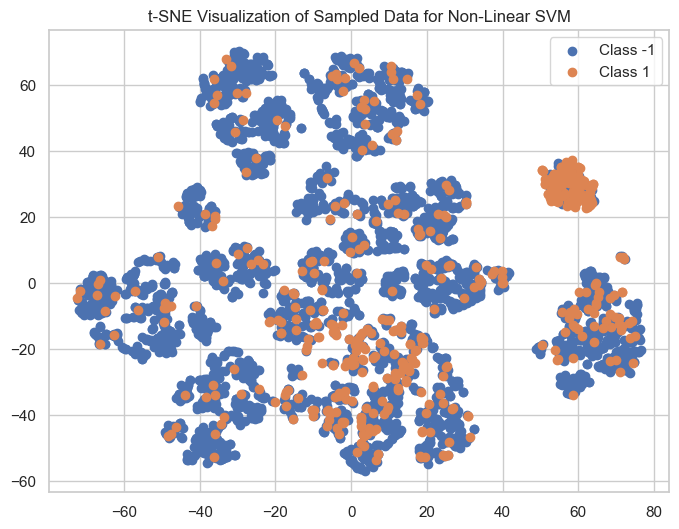

In [28]:
from sklearn.manifold import TSNE

X_train, X_sampled, y_train, y_sampled = train_test_split(X, y, test_size=0.1, random_state=42)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

# t-SNE visualization
plt.figure(figsize=(8, 6))
for i in np.unique(y_sampled):
    plt.scatter(X_tsne[y_sampled == i, 0], X_tsne[y_sampled == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of Sampled Data for Non-Linear SVM')
plt.legend()
plt.show()